In [1]:
import pandas as pd
import tdscraper as tds

# Data wrangling

In [2]:
ticker_FilePath = 'nmr_us_tickers_11-27-2022.csv'
data_DirPath = 'nmr_us_11-27-2022'

ticker_lists = pd.read_csv(ticker_FilePath) # Read tickers from Numerai ticker map
nmr_us = tds.build_big_df(ticker_lists.yahoo, data_DirPath)

c:\Quant_projects\tdscraper.py:1231: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[col] = big_df[col].astype('float64', copy=True, errors='ignore')
c:\Quant_projects\tdscraper.py:1231: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[col] = big_df[col].astype('float64', copy=True, errors='ignore')
c:\Quant_projects\tdscraper.py:1231: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [4]:
nmr_us.head()

,% Above Low,% Below High,% Held by Institutions,52-Wk Range,5yr Avg Return,5yr High,5yr Low,Annual Dividend $,Annual Dividend %,Annual Dividend Yield,Ask,Ask Size,Ask close,B/A Ratio,B/A Size,Beta,Bid,Bid Size,Bid close,Change Since Close,Change in Debt/Total Capital Quarter over Quarter,Closing Price,Day Change $,Day Change %,Day High,Day Low,Days to Cover,Dividend Change %,Dividend Growth 5yr,"Dividend Growth Rate, 3 Years",Dividend Pay Date,"EPS (TTM, GAAP)",EPS Growth (MRQ),EPS Growth (TTM),EPS Growth 5yr,Ex-dividend,Ex-dividend Date,FCF Growth 5yr,Float,Gross Profit Margin (TTM),Growth 1yr Consensus Est,Growth 1yr High Est,Growth 1yr Low Est,Growth 2yr Consensus Est,Growth 2yr High Est,Growth 2yr Low Est,Growth 3yr Historic,Growth 5yr Actual/Est,Growth 5yr Consensus Est,Growth 5yr High Est,Growth 5yr Low Est,Growth Analysts,Historical Volatility,Institutions Holding Shares,Interest Coverage (MRQ),Last (size),Last (time),Last Trade,Market Cap,Market Edge Opinion:,Net Profit Margin (TTM),Next Earnings Announcement,Operating Profit Margin (TTM),"P/E Ratio (TTM, GAAP)","PEG Ratio (TTM, GAAP)",Prev Close,Price,Price/Book (MRQ),Price/Cash Flow (TTM),Price/Earnings (TTM),"Price/Earnings (TTM, GAAP)",Price/Sales (TTM),Quick Ratio (MRQ),Return On Assets (TTM),Return On Equity (TTM),Return On Investment (TTM),Revenue Growth (MRQ),Revenue Growth (TTM),Revenue Growth 5yr,Revenue Per Employee (TTM),Shares Outstanding,Short Int Current Month,Short Int Pct of Float,Short Int Prev Month,Short Interest,Today's Open,Total Debt/Total Capital (MRQ),Volume,Volume 10-day Avg,Volume Past Day,cfra,cfra since,ford,ford since,marketEdge,marketEdge opinion,marketEdge opinion since,marketEdge since,newConstructs,newConstructs since,researchTeam,researchTeam since,theStreet,theStreet since
A,NaN,0.0348,0.8930,['112.52 - 162.62'],0.159983,179.57,60.42,0.90,0.0057,0.0057,156.96,100.0,NaN,5.0,500x100,1.1,152.40,500.0,NaN,NaN,0.0003,156.96,1.61,0.0104,156.96,154.71,2.27041,0.0814,0.100275,0.0873,2023-01-25 00:00:00,4.18,0.1223,0.0613,0.147804,2022-12-30 00:00:00,12/30/22,0.805355,294.17500,0.5435,0.145669,0.156863,0.134474,0.120040,0.127584,0.112496,0.131484,0.176900,0.156938,0.177692,0.136184,17.0,0.350,1333.0,27.56,30.0,5:00p ET 11/25/22,NaN,46.5B,Long,0.1831,2023-02-21 00:00:00,0.2363,37.55,3.02,155.35,NaN,8.75462,29.47371,37.55455,37.55,6.76157,1.47,0.1182,0.2349,0.1421,0.0763,0.0837,0.088961,NaN,295.00000,2889384.0,0.009829,2893740.0,0.0098,155.09,0.3436,642657.0,1531121.0,(Light),NaN,2021-08-18,rating-box,2022-05-06,rating-box,NaN,NaT,2016-03-28,rating-box,2022-11-25,rating-box,2022-05-06,NaN,NaT
AA,0.4274,NaN,0.7951,['33.55 - 98.09'],0.161717,98.09,5.16,0.40,0.0084,0.0084,47.89,1000.0,NaN,0.2,200x1000,2.4,47.62,200.0,NaN,NaN,-0.0005,47.89,-0.62,-0.0128,48.94,47.61,1.46924,NaN,NaN,NaN,2022-11-18 00:00:00,-0.86,-2.4120,-1.2010,NaN,2022-10-31 00:00:00,10/31/22,-3.928349,175.35470,0.2383,NaN,NaN,NaN,0.634384,-0.014815,1.283582,-1.679053,-1.812788,0.634384,-0.014815,1.283582,12.0,0.666,684.0,-0.27,115.0,5:00p ET 11/25/22,NaN,8.5B,Long,0.0068,2023-01-18 00:00:00,0.0378,NaN,NaN,48.51,NaN,1.57764,11.70376,NaN,NaN,0.64545,1.00,0.0061,-0.0259,0.0089,-0.2176,0.1717,0.054545,1076066.0,176.93720,10557332.0,0.060221,8646262.0,0.0602,48.55,0.2003,1687359.0,6501612.0,(Light),NaN,2022-04-23,rating-box,2022-09-23,rating-box,NaN,NaT,2022-10-20,rating-box,2022-11-25,rating-box,2022-09-23,NaN,NaT
AADI,0.2109,NaN,0.6271,['11.00 - 26.60'],-0.102367,82.50,6.30,NaN,NaN,NaN,20.73,200.0,NaN,2.5,500x200,1.3,12.85,500.0,NaN,NaN,-0.0100,13.32,0.15,0.0114,13.43,13.25,10.56765,NaN,NaN,NaN,No dividend,-2.97,0.2189,0.7442,NaN,NaN,No dividend,0.233978,20.63551,0.8077,3.956897,3.879310,4.034483,1.933734,1.815980,2.051488,1.612193,1.389829,0.966867,0.907990,1.025744,4.0,0.638,91.0,NaN,7.0,1:00p ET 11/25/22,NaN,324.9M,NaN,-5.6957,2023-03-16 00:00:00,-5.7471,NaN,NaN,13.17,NaN,1.92151,NaN,NaN,NaN,29.56984,10.57,-0.3450,-0.3911,-0.3754,0.2351,90.5750,NaN,281769.0,24.39512,1061468.0,0.05

In [5]:
nmr_us.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Index: 2209 entries, A to ZYXI
Data columns (total 104 columns):
 #    Column                                             Non-Null Count  Dtype         
---   ------                                             --------------  -----         
 0    % Above Low                                        1297 non-null   float64       
 1    % Below High                                       912 non-null    float64       
 2    % Held by Institutions                             2198 non-null   float64       
 3    52-Wk Range                                        2209 non-null   object        
 4    5yr Avg Return                                     2190 non-null   float64       
 5    5yr High                                           2190 non-null   float64       
 6    5yr Low                                            2190 non-null   float64       
 7    Annual Dividend $                                  997 non-null    float64       
 8    Annual Divi

In [6]:
# Drop the features with too many NaN, and duplicated, mundane ones.
to_drop = ['% Above Low', '% Below High', 'Annual Dividend $', 'Annual Dividend %',\
    'Ask close', 'Bid close', 'Change Since Close', 'Dividend Pay Date',\
    'Ex-dividend', 'Ex-dividend Date', 'Last (time)', 'Last Trade',\
    'Next Earnings Announcement', 'Price','cfra', 'cfra since',\
    'marketEdge', 'marketEdge opinion', 'marketEdge opinion since',\
    'marketEdge since', 'newConstructs', 'newConstructs since',\
    'researchTeam', 'researchTeam since', 'theStreet', 'theStreet since',\
    'ford', 'ford since']

In [7]:
X = nmr_us.drop(columns=to_drop)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2209 entries, A to ZYXI
Data columns (total 76 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   % Held by Institutions                             2198 non-null   float64
 1   52-Wk Range                                        2209 non-null   object 
 2   5yr Avg Return                                     2190 non-null   float64
 3   5yr High                                           2190 non-null   float64
 4   5yr Low                                            2190 non-null   float64
 5   Annual Dividend Yield                              984 non-null    float64
 6   Ask                                                2105 non-null   float64
 7   Ask Size                                           2043 non-null   float64
 8   B/A Ratio                                          2043 non-null   float64
 9   B/A Size     

In [8]:
X.head()

,% Held by Institutions,52-Wk Range,5yr Avg Return,5yr High,5yr Low,Annual Dividend Yield,Ask,Ask Size,B/A Ratio,B/A Size,Beta,Bid,Bid Size,Change in Debt/Total Capital Quarter over Quarter,Closing Price,Day Change $,Day Change %,Day High,Day Low,Days to Cover,Dividend Change %,Dividend Growth 5yr,"Dividend Growth Rate, 3 Years","EPS (TTM, GAAP)",EPS Growth (MRQ),EPS Growth (TTM),EPS Growth 5yr,FCF Growth 5yr,Float,Gross Profit Margin (TTM),Growth 1yr Consensus Est,Growth 1yr High Est,Growth 1yr Low Est,Growth 2yr Consensus Est,Growth 2yr High Est,Growth 2yr Low Est,Growth 3yr Historic,Growth 5yr Actual/Est,Growth 5yr Consensus Est,Growth 5yr High Est,Growth 5yr Low Est,Growth Analysts,Historical Volatility,Institutions Holding Shares,Interest Coverage (MRQ),Last (size),Market Cap,Market Edge Opinion:,Net Profit Margin (TTM),Operating Profit Margin (TTM),"P/E Ratio (TTM, GAAP)","PEG Ratio (TTM, GAAP)",Prev Close,Price/Book (MRQ),Price/Cash Flow (TTM),Price/Earnings (TTM),"Price/Earnings (TTM, GAAP)",Price/Sales (TTM),Quick Ratio (MRQ),Return On Assets (TTM),Return On Equity (TTM),Return On Investment (TTM),Revenue Growth (MRQ),Revenue Growth (TTM),Revenue Growth 5yr,Revenue Per Employee (TTM),Shares Outstanding,Short Int Current Month,Short Int Pct of Float,Short Int Prev Month,Short Interest,Today's Open,Total Debt/Total Capital (MRQ),Volume,Volume 10-day Avg,Volume Past Day
A,0.8930,['112.52 - 162.62'],0.159983,179.57,60.42,0.0057,156.96,100.0,5.0,500x100,1.1,152.40,500.0,0.0003,156.96,1.61,0.0104,156.96,154.71,2.27041,0.0814,0.100275,0.0873,4.18,0.1223,0.0613,0.147804,0.805355,294.17500,0.5435,0.145669,0.156863,0.134474,0.120040,0.127584,0.112496,0.131484,0.176900,0.156938,0.177692,0.136184,17.0,0.350,1333.0,27.56,30.0,46.5B,Long,0.1831,0.2363,37.55,3.02,155.35,8.75462,29.47371,37.55455,37.55,6.76157,1.47,0.1182,0.2349,0.1421,0.0763,0.0837,0.088961,NaN,295.00000,2889384.0,0.009829,2893740.0,0.0098,155.09,0.3436,642657.0,1531121.0,(Light)
AA,0.7951,['33.55 - 98.09'],0.161717,98.09,5.16,0.0084,47.89,1000.0,0.2,200x1000,2.4,47.62,200.0,-0.0005,47.89,-0.62,-0.0128,48.94,47.61,1.46924,NaN,NaN,NaN,-0.86,-2.4120,-1.2010,NaN,-3.928349,175.35470,0.2383,NaN,NaN,NaN,0.634384,-0.014815,1.283582,-1.679053,-1.812788,0.634384,-0.014815,1.283582,12.0,0.666,684.0,-0.27,115.0,8.5B,Long,0.0068,0.0378,NaN,NaN,48.51,1.57764,11.70376,NaN,NaN,0.64545,1.00,0.0061,-0.0259,0.0089,-0.2176,0.1717,0.054545,1076066.0,176.93720,10557332.0,0.060221,8646262.0,0.0602,48.55,0.2003,1687359.0,6501612.0,(Light)
AADI,0.6271,['11.00 - 26.60'],-0.102367,82.50,6.30,NaN,20.73,200.0,2.5,500x200,1.3,12.85,500.0,-0.0100,13.32,0.15,0.0114,13.43,13.25,10.56765,NaN,NaN,NaN,-2.97,0.2189,0.7442,NaN,0.233978,20.63551,0.8077,3.956897,3.879310,4.034483,1.933734,1.815980,2.051488,1.612193,1.389829,0.966867,0.907990,1.025744,4.0,0.638,91.0,NaN,7.0,324.9M,NaN,-5.6957,-5.7471,NaN,NaN,13.17,1.92151,NaN,NaN,NaN,29.56984,10.57,-0.3450,-0.3911,-0.3754,0.2351,90.5750,NaN,281769.0,24.39512,1061468.0,0.054996,937861.0,0.0550,13.30,0.0000,28331.0,83176.0,(Light)
AAL,0.5195,['11.65 - 21.42'],-0.155283,59.08,8.25,NaN,14.52,200.0,14.5,2900x200,1.5,14.49,2900.0,-0.0002,14.50,0.08,0.0055,14.70,14.35,3.36805,NaN,NaN,NaN,-2.52,-0.0559,0.5406,NaN,0.696896,642.22580,0.5737,-0.921103,-0.995714,-0.846491,-26.912932,-52.831190,-0.994674,-1.396500,-3.451840,-14.874383,-27.765626,-1.983140,16.0,0.578,712.0,2.26,298.0,9.4B,Long,-0.0356,-0.0123,NaN,NaN,14.42,NaN,10.57639,NaN,NaN,0.20844,0.69,-0.0238,NaN,-0.0341,0.0030,0.8466,-0.057325,366370.0,649.90090,91398791.0,0.142367,86494438.0,0.1424,14.40,1.2718,9903925.0,25450420.0,(Light)
AAN,0.9229,['7.65 - 25.96'],-0.204233,37.49,7.65,0.0389,12.85,100.0,4.0,400x100,NaN,6.00,400.0,NaN,11.58,-0.27,-0.0228,11.94,11.58,3.97409,NaN,NaN,NaN,0.50,-1.9187,-0.8207,0.099807,-22.939366,29.80933,0.5478,NaN,NaN,NaN,-0.145074,0.009852,-0.300000,0.080574,-0.127797,-0.145074,0.009852,-0.300000,8.0,0.801,242.0,2.93,1.0,356.4M,NaN,0.0080,0.0112,22.97,NaN,11.85,0.50651,0.60226,

In [9]:
X[['P/E Ratio (TTM, GAAP)', 'Price/Earnings (TTM)', 'Price/Earnings (TTM, GAAP)']]

,"P/E Ratio (TTM, GAAP)",Price/Earnings (TTM),"Price/Earnings (TTM, GAAP)"
A,37.55,37.55455,37.55
AA,NaN,NaN,NaN
AADI,NaN,NaN,NaN
AAL,NaN,NaN,NaN
AAN,22.97,22.97163,22.97
...,...,...,...
ZTS,34.31,34.30708,33.86
ZUMZ,7.79,7.79296,7.59
ZUO,NaN,NaN,NaN
ZWS,58.18,58.17544,55.70


In [10]:
X = X.drop(columns=['P/E Ratio (TTM, GAAP)'])

In [11]:
X['52-Wk Low'] = X['52-Wk Range'].map(lambda x: float(x.strip("[]'").replace(' ', '').replace(',', '').split('-')[0]))
X['52-Wk High']= X['52-Wk Range'].map(lambda x: float(x.strip("[]'").replace(' ', '').replace(',', '').split('-')[1]))
X = X.drop(columns='52-Wk Range')

In [12]:
# There are bid size and ask size already. No need for B/A Size
X.drop(columns='B/A Size', inplace=True)

In [13]:
def market_cap_transform(value):
    if value[-1] == 'M':
        return float(value[:-1]) * 1e6
    elif value[-1] == 'B':
        return float(value[:-1]) * 1e9
    elif value[-1] == 'T':
        return float(value[:-1]) * 1e12
    else:
         raise ValueError("Invalid input")

In [14]:
X['Market Cap'] = X["Market Cap"].map(market_cap_transform)

In [15]:
X.dtypes[X.dtypes == 'object'].index

Index(['Market Edge Opinion:', 'Volume Past Day'], dtype='object')

In [16]:
X['Market Edge Opinion:'].unique()

array(['Long', nan, 'Neutral From Long', 'Neutral From Avoid', 'Avoid'],
      dtype=object)

In [17]:
# There already is volume data. The Volume Past Day doesn't provide more information.
X.drop(columns='Volume Past Day', inplace=True) 

In [18]:
# Use get_dummies to transform object dtype features into numerics
X = pd.get_dummies(X, drop_first=True)

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2209 entries, A to ZYXI
Data columns (total 76 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   % Held by Institutions                             2198 non-null   float64
 1   5yr Avg Return                                     2190 non-null   float64
 2   5yr High                                           2190 non-null   float64
 3   5yr Low                                            2190 non-null   float64
 4   Annual Dividend Yield                              984 non-null    float64
 5   Ask                                                2105 non-null   float64
 6   Ask Size                                           2043 non-null   float64
 7   B/A Ratio                                          2043 non-null   float64
 8   Beta                                               1857 non-null   float64
 9   Bid          

In [20]:
X.isna().sum().sort_values(ascending=False)

PEG Ratio (TTM, GAAP)                                1607
Dividend Growth 5yr                                  1443
Dividend Growth Rate, 3 Years                        1397
Dividend Change %                                    1367
Annual Dividend Yield                                1225
EPS Growth 5yr                                       1029
Quick Ratio (MRQ)                                     962
Interest Coverage (MRQ)                               747
Price/Earnings (TTM, GAAP)                            719
Price/Earnings (TTM)                                  707
Price/Cash Flow (TTM)                                 586
Growth 1yr Consensus Est                              522
Growth 1yr High Est                                   522
Growth 1yr Low Est                                    522
Gross Profit Margin (TTM)                             461
Revenue Growth 5yr                                    445
Closing Price                                         439
Volume 10-day 

In [21]:
X[['Price/Earnings (TTM)', 'EPS (TTM, GAAP)', 'EPS Growth (MRQ)', 'EPS Growth (TTM)', 'PEG Ratio (TTM, GAAP)']].tail(20)

,Price/Earnings (TTM),"EPS (TTM, GAAP)",EPS Growth (MRQ),EPS Growth (TTM),"PEG Ratio (TTM, GAAP)"
YEXT,NaN,-0.73,0.1833,-0.0574,NaN
YMAB,NaN,-3.06,0.3308,-2.2982,NaN
YOU,NaN,-0.47,-4.1136,-5.6853,NaN
YUM,28.82403,4.39,0.4828,-0.1533,2.96
ZBH,74.18955,1.61,0.2622,-0.5972,10.46
ZBRA,31.03665,8.76,2.7341,-0.4413,NaN
JCOM,11.47081,7.83,NaN,NaN,NaN
ZETA,NaN,-2.37,0.2196,-1.1301,NaN
ZG,NaN,-1.10,-3.6207,-2.9003,NaN
ZI,123.84180,0.22,0.1250,2.2790,3.96


In [22]:
# Drop PEG ratio for too many NaN, also there are P/E ratio and eps growth data.
X.drop(columns='PEG Ratio (TTM, GAAP)', inplace=True)

In [23]:
X.head()

,% Held by Institutions,5yr Avg Return,5yr High,5yr Low,Annual Dividend Yield,Ask,Ask Size,B/A Ratio,Beta,Bid,Bid Size,Change in Debt/Total Capital Quarter over Quarter,Closing Price,Day Change $,Day Change %,Day High,Day Low,Days to Cover,Dividend Change %,Dividend Growth 5yr,"Dividend Growth Rate, 3 Years","EPS (TTM, GAAP)",EPS Growth (MRQ),EPS Growth (TTM),EPS Growth 5yr,FCF Growth 5yr,Float,Gross Profit Margin (TTM),Growth 1yr Consensus Est,Growth 1yr High Est,Growth 1yr Low Est,Growth 2yr Consensus Est,Growth 2yr High Est,Growth 2yr Low Est,Growth 3yr Historic,Growth 5yr Actual/Est,Growth 5yr Consensus Est,Growth 5yr High Est,Growth 5yr Low Est,Growth Analysts,Historical Volatility,Institutions Holding Shares,Interest Coverage (MRQ),Last (size),Market Cap,Net Profit Margin (TTM),Operating Profit Margin (TTM),Prev Close,Price/Book (MRQ),Price/Cash Flow (TTM),Price/Earnings (TTM),"Price/Earnings (TTM, GAAP)",Price/Sales (TTM),Quick Ratio (MRQ),Return On Assets (TTM),Return On Equity (TTM),Return On Investment (TTM),Revenue Growth (MRQ),Revenue Growth (TTM),Revenue Growth 5yr,Revenue Per Employee (TTM),Shares Outstanding,Short Int Current Month,Short Int Pct of Float,Short Int Prev Month,Short Interest,Today's Open,Total Debt/Total Capital (MRQ),Volume,Volume 10-day Avg,52-Wk Low,52-Wk High,Market Edge Opinion:_Long,Market Edge Opinion:_Neutral From Avoid,Market Edge Opinion:_Neutral From Long
A,0.8930,0.159983,179.57,60.42,0.0057,156.96,100.0,5.0,1.1,152.40,500.0,0.0003,156.96,1.61,0.0104,156.96,154.71,2.27041,0.0814,0.100275,0.0873,4.18,0.1223,0.0613,0.147804,0.805355,294.17500,0.5435,0.145669,0.156863,0.134474,0.120040,0.127584,0.112496,0.131484,0.176900,0.156938,0.177692,0.136184,17.0,0.350,1333.0,27.56,30.0,4.650000e+10,0.1831,0.2363,155.35,8.75462,29.47371,37.55455,37.55,6.76157,1.47,0.1182,0.2349,0.1421,0.0763,0.0837,0.088961,NaN,295.00000,2889384.0,0.009829,2893740.0,0.0098,155.09,0.3436,642657.0,1531121.0,112.52,162.62,1,0,0
AA,0.7951,0.161717,98.09,5.16,0.0084,47.89,1000.0,0.2,2.4,47.62,200.0,-0.0005,47.89,-0.62,-0.0128,48.94,47.61,1.46924,NaN,NaN,NaN,-0.86,-2.4120,-1.2010,NaN,-3.928349,175.35470,0.2383,NaN,NaN,NaN,0.634384,-0.014815,1.283582,-1.679053,-1.812788,0.634384,-0.014815,1.283582,12.0,0.666,684.0,-0.27,115.0,8.500000e+09,0.0068,0.0378,48.51,1.57764,11.70376,NaN,NaN,0.64545,1.00,0.0061,-0.0259,0.0089,-0.2176,0.1717,0.054545,1076066.0,176.93720,10557332.0,0.060221,8646262.0,0.0602,48.55,0.2003,1687359.0,6501612.0,33.55,98.09,1,0,0
AADI,0.6271,-0.102367,82.50,6.30,NaN,20.73,200.0,2.5,1.3,12.85,500.0,-0.0100,13.32,0.15,0.0114,13.43,13.25,10.56765,NaN,NaN,NaN,-2.97,0.2189,0.7442,NaN,0.233978,20.63551,0.8077,3.956897,3.879310,4.034483,1.933734,1.815980,2.051488,1.612193,1.389829,0.966867,0.907990,1.025744,4.0,0.638,91.0,NaN,7.0,3.249000e+08,-5.6957,-5.7471,13.17,1.92151,NaN,NaN,NaN,29.56984,10.57,-0.3450,-0.3911,-0.3754,0.2351,90.5750,NaN,281769.0,24.39512,1061468.0,0.054996,937861.0,0.0550,13.30,0.0000,28331.0,83176.0,11.00,26.60,0,0,0
AAL,0.5195,-0.155283,59.08,8.25,NaN,14.52,200.0,14.5,1.5,14.49,2900.0,-0.0002,14.50,0.08,0.0055,14.70,14.35,3.36805,NaN,NaN,NaN,-2.52,-0.0559,0.5406,NaN,0.696896,642.22580,0.5737,-0.921103,-0.995714,-0.846491,-26.912932,-52.831190,-0.994674,-1.396500,-3.451840,-14.874383,-27.765626,-1.983140,16.0,0.578,712.0,2.26,298.0,9.400000e+09,-0.0356,-0.0123,14.42,NaN,10.57639,NaN,NaN,0.20844,0.69,-0.0238,NaN,-0.0341,0.0030,0.8466,-0.057325,366370.0,649.90090,91398791.0,0.142367,86494438.0,0.1424,14.40,1.2718,9903925.0,25450420.0,11.65,21.42,1,0,0
AAN,0.9229,-0.204233,37.49,7.65,0.0389,12.85,100.0,4.0,NaN,6.00,400.0,NaN,11.58,-0.27,-0.0228,11.94,11.58,3.97409,NaN,NaN,NaN,0.50,-1.9187,-0.8207,0.099807,-22.939366,29.80933,0.5478,NaN,NaN,NaN,-0.145074,0.009852,-0.300000,0.080574,-0.127797,-0.145074,0.009852,-0.300000,8.0,0.801,242.0,2.93,1.0,3.564000e+08,0.0080,0.0112,11.85,0.50651,0.60226,22.97163,22.97,0.16936,NaN,0.0102,0.0237,0.0188,-0.0279,0.1495,-0.010553,229515.0,30.78048,1727681.0,0.0

In [24]:
X.isna().sum().sort_values(ascending=False)

Dividend Growth 5yr                                  1443
Dividend Growth Rate, 3 Years                        1397
Dividend Change %                                    1367
Annual Dividend Yield                                1225
EPS Growth 5yr                                       1029
Quick Ratio (MRQ)                                     962
Interest Coverage (MRQ)                               747
Price/Earnings (TTM, GAAP)                            719
Price/Earnings (TTM)                                  707
Price/Cash Flow (TTM)                                 586
Growth 1yr Low Est                                    522
Growth 1yr High Est                                   522
Growth 1yr Consensus Est                              522
Gross Profit Margin (TTM)                             461
Revenue Growth 5yr                                    445
Volume 10-day Avg                                     439
Volume                                                439
Closing Price 

The features left are included for modelling, even though there are still a plenty of missing values for some features.

In [25]:
import numpy as np

In [26]:
# Replace inf, -inf with NaN
X = X.replace([np.inf, -np.inf], np.NaN)

# Grab the price data for producing targets

In [27]:
# Get the log returns for each ticker
import yfinance as yf

In [28]:
start_date = '2022-11-27'
end_date = '2022-12-14'

In [29]:
# Revise some tickers from numerai-ticker-map to the current using ones.
ticker_change = {'ADS': 'BFH', 'SGMS': 'LNW', 'LLNW': 'EGIO', 'ADEAV': 'ADEA',\
    'ETH': 'ETD', 'BOMN': 'BOC', 'ANTM': 'ELV', 'JCOM': 'ZD', 'FB': 'META',\
    'NCBS': 'NIC', 'ELY': 'MODG', 'PVAC': 'ROCC', 'BLL': 'BALL', 'RLGY': 'HOUS',\
    'VIAC': 'PARA'}
ticker_lists = ticker_lists.yahoo.map(lambda x: ticker_change[x] if x in ticker_change else x)
ticks = yf.Tickers(list(ticker_lists))

In [30]:
nmr_us_close = ticks.history(start=start_date, end=end_date).Close

[*********************100%***********************]  2209 of 2209 completed


In [31]:
nmr_us_close.tail()

,A,AA,AADI,AAL,AAN,AAON,AAP,AAPL,AAWW,ABBV,ABC,ABCB,ABCL,ABG,ABM,ABMD,ABNB,ABT,ABUS,ACA,ACAD,ACCD,ACEL,ACET,ACGL,ACHC,ACHR,ACI,ACIW,ACLS,ACLX,ACM,ACMR,ACN,ACRS,ACT,ACVA,ADBE,ADEA,ADI,ADM,ADNT,ADP,ADPT,ADSK,ADT,ADTN,ADUS,ADV,AEE,AEIS,AEL,AEO,AEP,AES,AEVA,AFG,AFL,AFMD,AFRM,AGCO,AGEN,AGIO,AGL,AGO,AGR,AGTI,AGYS,AHCO,AI,AIG,AIMC,AIN,AIR,AIT,AIZ,AJG,AJRD,AKAM,AKRO,AKYA,AL,ALB,ALBO,ALE,ALEC,ALG,ALGM,ALGN,ALGT,ALHC,ALK,ALKS,ALKT,ALL,ALLE,ALLO,ALLY,ALNY,ALRM,...,VVX,VWE,VXRT,VZ,VZIO,W,WAB,WABC,WAFD,WAL,WASH,WAT,WBA,WBS,WCC,WD,WDAY,WDC,WDFC,WEAV,WEC,WEN,WERN,WETF,WEX,WFC,WFRD,WGO,WH,WHD,WHR,WING,WIRE,WIX,WK,WLK,WM,WMB,WMS,WMT,WNC,WOLF,WOOF,WOR,WOW,WRB,WRBY,WRK,WSBC,WSC,WSFS,WSM,WSO,WST,WTFC,WTRG,WTS,WTTR,WTW,WU,WW,WWD,WWE,WWW,WYNN,X,XEL,XMTR,XNCR,XOM,XPEL,XPO,XPOF,XPRO,XRAY,XRX,XXII,XYL,YELP,YETI,YEXT,YMAB,YOU,YUM,ZBH,ZBRA,ZD,ZETA,ZG,ZI,ZION,ZIP,ZM,ZNTL,ZS,ZTS,ZUMZ,ZUO,ZWS,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-08,156.279999,47.279999,13.27,13.60,11.85,79.919998,146.589996,142.649994,100.639999,165.990005,170.460007,50.320000,11.14,181.539993,45.189999,380.750000,94.830002,106.919998,2.72,59.259998,14.63,8.77,8.28,19.879999,60.560001,83.320000,2.15,21.570000,20.879999,81.930000,21.68,85.489998,9.00,292.149994,15.51,24.430000,8.82,332.579987,10.54,169.649994,92.400002,34.480000,260.049988,8.84,196.630005,9.82,20.490000,105.889999,2.05,88.180000,91.500000,40.130001,16.26,97.720001,28.340000,1.53,138.300003,70.320000,2.05,11.62,135.119995,2.51,28.690001,17.330000,63.400002,42.520000,16.66,63.080002,22.01,12.90,62.259998,59.400002,102.489998,46.230000,128.080002,130.029999,195.029999,54.060001,89.930000,43.599998,12.33,38.009998,256.029999,21.450001,64.699997,8.69,146.600006,32.599998,190.460007,71.260002,11.97,44.060001,25.480000,13.35,130.029999,110.860001,8.98,24.830000,238.009995,49.490002,...,39.520000,3.65,1.14,37.099998,8.82,36.959999,102.349998,59.000000,33.799999,61.020000,48.230000,343.040009,40.900002,47.419998,123.290001,83.250000,169.330002,35.230000,167.919998,4.32,95.660004,23.280001,42.980000,5.29,159.539993,42.580002,42.990002,55.290001,72.320000,50.200001,145.360001,154.850006,140.250000,83.860001,80.239998,106.940002,166.009995,32.910000,88.639999,148.779999,24.690001,85.440002,10.59,53.949795,9.75,74.440002,16.719999,36.000000,38.599998,46.700001,46.509998,113.269997,263.799988,236.029999,87.080002,48.259998,152.570007,8.11,245.750000,13.91,4.08,93.800003,76.820000,10.26,86.430000,26.110001,69.809998,40.000000,30.040001,104.419998,66.820000,35.790001,22.059999,15.46,30.280001,15.960000,1.020,111.339996,28.209999,45.279999,6.57,4.60,28.60,129.850006,125.839996,252.820007,86.989998,8.32,33.959999,28.500000,47.380001,16.090000,72.360001,19.750000,119.529999,153.679993,23.510000,5.95,24.350000,14.15
2022-12-09,152.949997,45.080002,13.26,13.53,11.73,80.500000,145.899994,142.160004,100.540001,163.059998,165.330002,50.259998,10.47,181.179993,45.619999,380.750000,94.699997,107.510002,2.61,58.950001,14.49,8.99,8.23,17.270000,60.040001,82.250000,2.14,21.379999,20.740000,81.949997,28.02,83.709999,8.75,288.410004,15.16,24.320000,8.83,330.640015,10.23,168.679993,91.879997,33.720001,257.200012,8.25,194.309998,9.64,19.969999,103.169998,2.17,88.610001,90.709999,39.959999,15.82,96.580002,28.520000,1.53,135.970001,69.959999,2.04,11.34,132.729996,2.42,28.160000,17.309999,63.020000,42.639999,16.52,60.900002,21.77,12.20,62.509998,59.259998,100.879997,45.419998,127.529999,130.360001,191.830002,53.889999,89.019997,42.950001,12.36,38.200001,253.250000,21.360001,65.000000,8.64,145.740005,32.480000,188.809998,72.339996,11.58,44.560001,24.700001,13.62,128.550003,109.129997,8.76,25.010000,231.330002,50.330002,...,38.889999,3.75,1.03,37.400002,8.77,37.750000,100.389999,58.279999,33.580002,60.759998,47.880001,336.529999,40.430000,47.209999,121.290001,80.790001,169.600006,35

In [32]:
nmr_us_close.isna().sum(axis=1)

Date
2022-11-28       0
2022-11-29       0
2022-11-30       0
2022-12-01       1
2022-12-02       1
2022-12-05       1
2022-12-06       1
2022-12-07       2
2022-12-08       2
2022-12-09       2
2022-12-12       2
2022-12-13       2
2022-12-14    2209
Freq: B, dtype: int64

In [33]:
for idx in nmr_us_close.index[:-1]:
    print(nmr_us_close.loc[idx][nmr_us_close.loc[idx].isna()])

Series([], Name: 2022-11-28 00:00:00, dtype: float64)
Series([], Name: 2022-11-29 00:00:00, dtype: float64)
Series([], Name: 2022-11-30 00:00:00, dtype: float64)
FBC   NaN
Name: 2022-12-01 00:00:00, dtype: float64
FBC   NaN
Name: 2022-12-02 00:00:00, dtype: float64
FBC   NaN
Name: 2022-12-05 00:00:00, dtype: float64
FBC   NaN
Name: 2022-12-06 00:00:00, dtype: float64
FBC    NaN
SWCH   NaN
Name: 2022-12-07 00:00:00, dtype: float64
FBC    NaN
SWCH   NaN
Name: 2022-12-08 00:00:00, dtype: float64
FBC    NaN
SWCH   NaN
Name: 2022-12-09 00:00:00, dtype: float64
FBC    NaN
SWCH   NaN
Name: 2022-12-12 00:00:00, dtype: float64
FBC    NaN
SWCH   NaN
Name: 2022-12-13 00:00:00, dtype: float64


In [34]:
# Drop the stocks with too many NaN
removed_stocks = ['FBC','SWCH']
nmr_us_close = nmr_us_close.drop(columns=removed_stocks)

In [35]:
nmr_us_close.dropna(inplace=True)

In [36]:
log_close = np.log(nmr_us_close)

In [37]:
log_close.iloc[-1]

A       5.060441
AA      3.832330
AADI    2.588516
AAL     2.599722
AAN     2.518503
          ...   
ZTS     5.043232
ZUMZ    3.133318
ZUO     1.859418
ZWS     3.216874
ZYXI    2.613739
Name: 2022-12-13 00:00:00, Length: 2207, dtype: float64

In [38]:
log_returns = log_close.iloc[-1] - log_close.iloc[0]

In [39]:
log_returns

A       0.034589
AA     -0.005616
AADI    0.001504
AAL    -0.027118
AAN     0.067497
          ...   
ZTS     0.045141
ZUMZ   -0.021553
ZUO    -0.155485
ZWS     0.046768
ZYXI    0.010309
Length: 2207, dtype: float64

In [40]:
# Match the stock list with fundamental data
X.index = X.index.map(lambda x: ticker_change[x] if x in ticker_change else x)
X = X.drop(index=removed_stocks)

Check the relationship between simple returns and log returns

In [41]:
simple_returns = nmr_us_close.iloc[-1] / nmr_us_close.iloc[0] - 1

In [42]:
import matplotlib.pyplot as plt

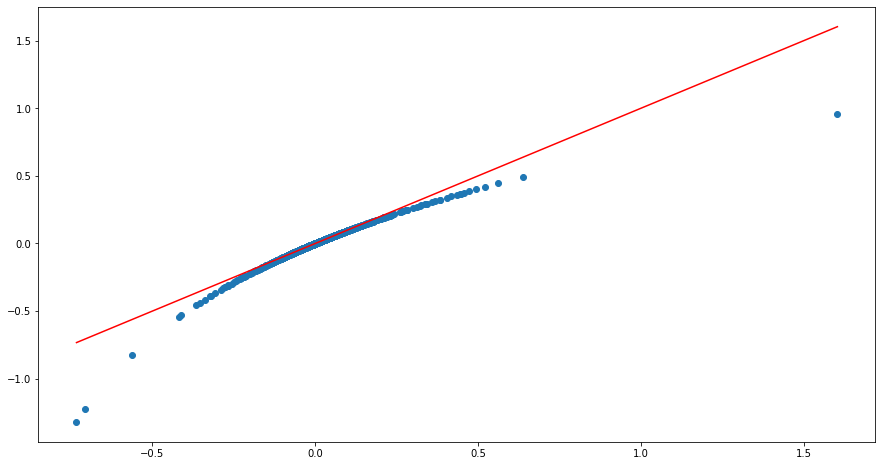

In [43]:
plt.figure(figsize=(15,8))
plt.scatter(simple_returns, log_returns)
plt.plot(np.linspace(min(simple_returns), max(simple_returns),10),\
    np.linspace(min(simple_returns), max(simple_returns),10), color='r')

In [44]:
# Create target DataFrame
targets = pd.DataFrame(log_returns, columns=['log_return'])

In [45]:
# Create a class for classifying returns that are above/below 0
targets.loc[targets.log_return > 0, 'class1'] = 1
targets.loc[targets.log_return <= 0, 'class1'] = 0

# Create a class for classifying returns that are above/below average
targets.loc[(targets.log_return - targets.log_return.mean()) > 0, 'class2'] = 1
targets.loc[(targets.log_return - targets.log_return.mean()) <= 0, 'class2'] = 0

In [46]:
# Impute the missing values and compare the imputing methods by 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [47]:
# Now for some helper functions to make it easier to compare imputation methods
# Note that these are modified versions of the code found in the scikit learn docs
from sklearn.preprocessing import StandardScaler

N_SPLITS = 5 # Fold numbers for cv scoring
def get_scores_for_imputer(imputer, X_missing, y_missing, regressor, scoring, scale=True):
    if scale:
        steps = [('scaler', StandardScaler()), 
                 ('imputer', imputer), 
                 ('regressor', regressor)]
    else:
        steps = [('imputer', imputer), 
                 ('regressor', regressor)]
        
    estimator = Pipeline(steps=steps)
    impute_scores = cross_val_score(estimator, X_missing, y_missing,
                                    scoring=scoring,
                                    cv=N_SPLITS)
    return impute_scores

def get_impute_zero_score(X_missing, y_missing, regressor, scoring):

    imputer = SimpleImputer(missing_values=np.nan, add_indicator=True,
                            strategy='constant', fill_value=0)
    zero_impute_scores = get_scores_for_imputer(imputer, 
                                                X_missing, 
                                                y_missing, 
                                                regressor, 
                                                scoring)
    return zero_impute_scores.mean(), zero_impute_scores.std()

def get_impute_knn_score(X_missing, y_missing, regressor, scoring, n_neighbors=5):
    imputer = KNNImputer(missing_values=np.nan, 
                         add_indicator=True, 
                         n_neighbors=n_neighbors,
                         weights='distance')
    knn_impute_scores = get_scores_for_imputer(imputer, 
                                               X_missing, 
                                               y_missing, 
                                               regressor, 
                                               scoring)
    return knn_impute_scores.mean(), knn_impute_scores.std()

def get_impute_mean(X_missing, y_missing, regressor, scoring):
    imputer = SimpleImputer(missing_values=np.nan, strategy="mean",
                            add_indicator=True)
    mean_impute_scores = get_scores_for_imputer(imputer, 
                                                X_missing, 
                                                y_missing, 
                                                regressor, 
                                                scoring)
    return mean_impute_scores.mean(), mean_impute_scores.std()

def get_impute_iterative(X_missing, y_missing, regressor, scoring, estimator=None,
                         n_nearest_features=None, max_iter=10
                        ):
    sample_posterior = False
    if 'BayesianRidge' in str(estimator):
        sample_posterior = True
    elif estimator is None:
        n_nearest_features = 5
        sample_posterior = True
       
    imputer = IterativeImputer(estimator=estimator,
                               missing_values=np.nan, 
                               max_iter=max_iter,
                               add_indicator=True,
                               random_state=0, 
                               n_nearest_features=n_nearest_features,
                               sample_posterior=sample_posterior
                              )
    iterative_impute_scores = get_scores_for_imputer(imputer,
                                                     X_missing,
                                                     y_missing,
                                                     regressor,
                                                     scoring
                                                    )
    
    return iterative_impute_scores.mean(), iterative_impute_scores.std()

In [48]:
# Function to graph results of imputation comparisons
def graph_imputer_scores(scores, stds, labels, scoring, regressor=None, iterative=False):
    n_bars = len(scores)
    xval = np.arange(n_bars)
    
    if regressor is not None:
        name = str(regressor).split('(')[0]
        title_string = ' with {}'.format(name)
    else:
        title_string = ''

    x_labels = labels
    colors = ['r', 'g', 'b', 'orange', 'black']

    plt.figure(figsize=(12, 6))
    ax1 = plt.subplot(111)
    for j in xval:
        ax1.barh(j, scores[j], xerr=stds[j],
                 color=colors[j], alpha=0.6, align='center')
    if not iterative:
        ax1.set_title('Imputation Techniques Comparison{}'.format(title_string))
    else:
        ax1.set_title('Iterative Imputation Estimator Comparison{}'.format(title_string))
    ax1.set_xlim(left=np.min(scores*2) * 0.9,
                 right=np.max(scores*2) * 1.1)
    ax1.set_yticks(xval)
    ax1.set_xlabel(scoring)
    ax1.invert_yaxis()
    ax1.set_yticklabels(x_labels)

    return ax1

# Creating a wrapper function to keep code DRY
def compare_imputer_scores(X, y, regressor, scoring, iterative_estimators=None, max_iter=10):
    # Getting scores for these imputers
    zero_scores = get_impute_zero_score(X, y, regressor, scoring)
    mean_scores = get_impute_mean(X, y, regressor, scoring)
    knn_scores = get_impute_knn_score(X, y, regressor, scoring)
    iter_scores = get_impute_iterative(X, y, regressor, scoring, n_nearest_features=5)
    
    scores = [zero_scores[0], mean_scores[0], knn_scores[0], iter_scores[0]]
    stds = [zero_scores[1], mean_scores[1], knn_scores[1], iter_scores[1]]
    
    # Graphing the scores of the imputation methods above
    labels = ['Zero imputation',
              'Mean Imputation',
              'KNN Imputation',
              'Iterative Imputation']
    
    # Now to run through the estimators for IterativeImputer
    results = []

    if iterative_estimators:
        labels2 = []
        for estimator in iterative_estimators:
            name = str(estimator).split('(')[0]
            print('Imputing with IterativeImputer using {} estimator'.format(name))
            labels2.append(name)
            
            n_nearest_features = None
            if 'BayesianRidge' in str(estimator):
                n_nearest_features = 5
                
            results.append(get_impute_iterative(X,
                                                y,
                                                regressor,
                                                scoring,
                                                estimator,
                                                n_nearest_features=n_nearest_features,
                                                max_iter=max_iter
                                              )
                         )
            
        scores2 = [results[i][0] for i in range(len(results))]
        stds2 = [results[i][1] for i in range(len(results))]
    
    ax1 = graph_imputer_scores(scores, stds, labels, scoring, regressor)
    
    if iterative_estimators:
        ax2 = graph_imputer_scores(scores2, stds2, labels2, scoring, regressor, iterative=True)
        return ax1, ax2
        
    return ax1

In [49]:
# Load a regressor model and instantiate
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()

# Load some estimators to use with IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [50]:
# Check the metric name for examining model performance
import sklearn.metrics

sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [51]:
y = targets.log_return

Imputing with IterativeImputer using BayesianRidge estimator
Imputing with IterativeImputer using DecisionTreeRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using ExtraTreesRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using KNeighborsRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


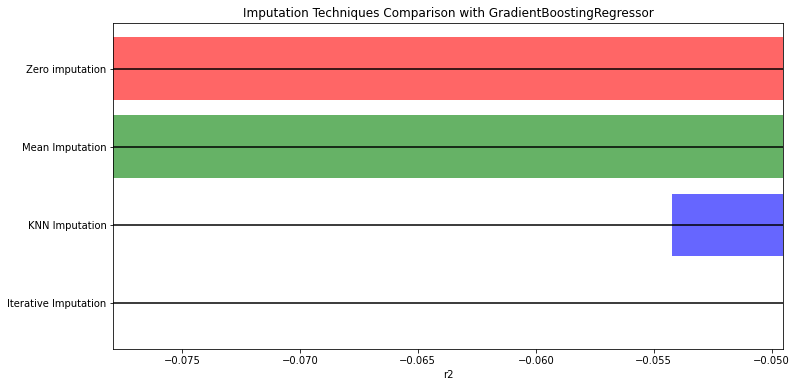

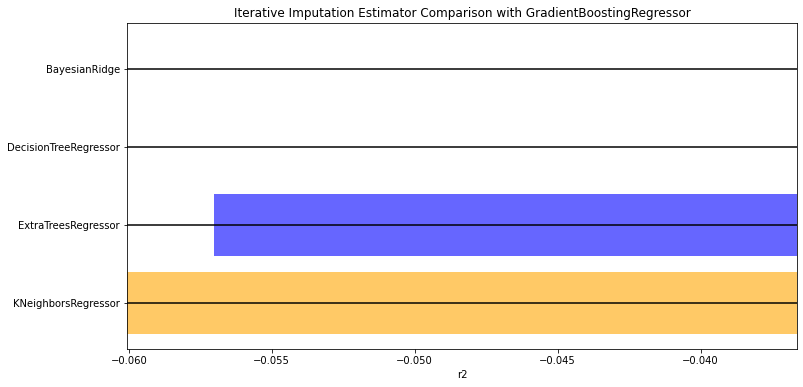

In [52]:
# Creating a list of these estimators with some set params
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='auto', random_state=0),
              ExtraTreesRegressor(n_estimators=20, max_features='sqrt', random_state=0),
              KNeighborsRegressor(n_neighbors=30)
             ]

# Pass our data, regressor, and estimators into wrapper function to get plots
ax1, ax2 = compare_imputer_scores(X, 
                                  y,
                                  reg, 
                                  scoring='r2', 
                                  iterative_estimators=estimators)

The regression does not perform well.

<AxesSubplot:>

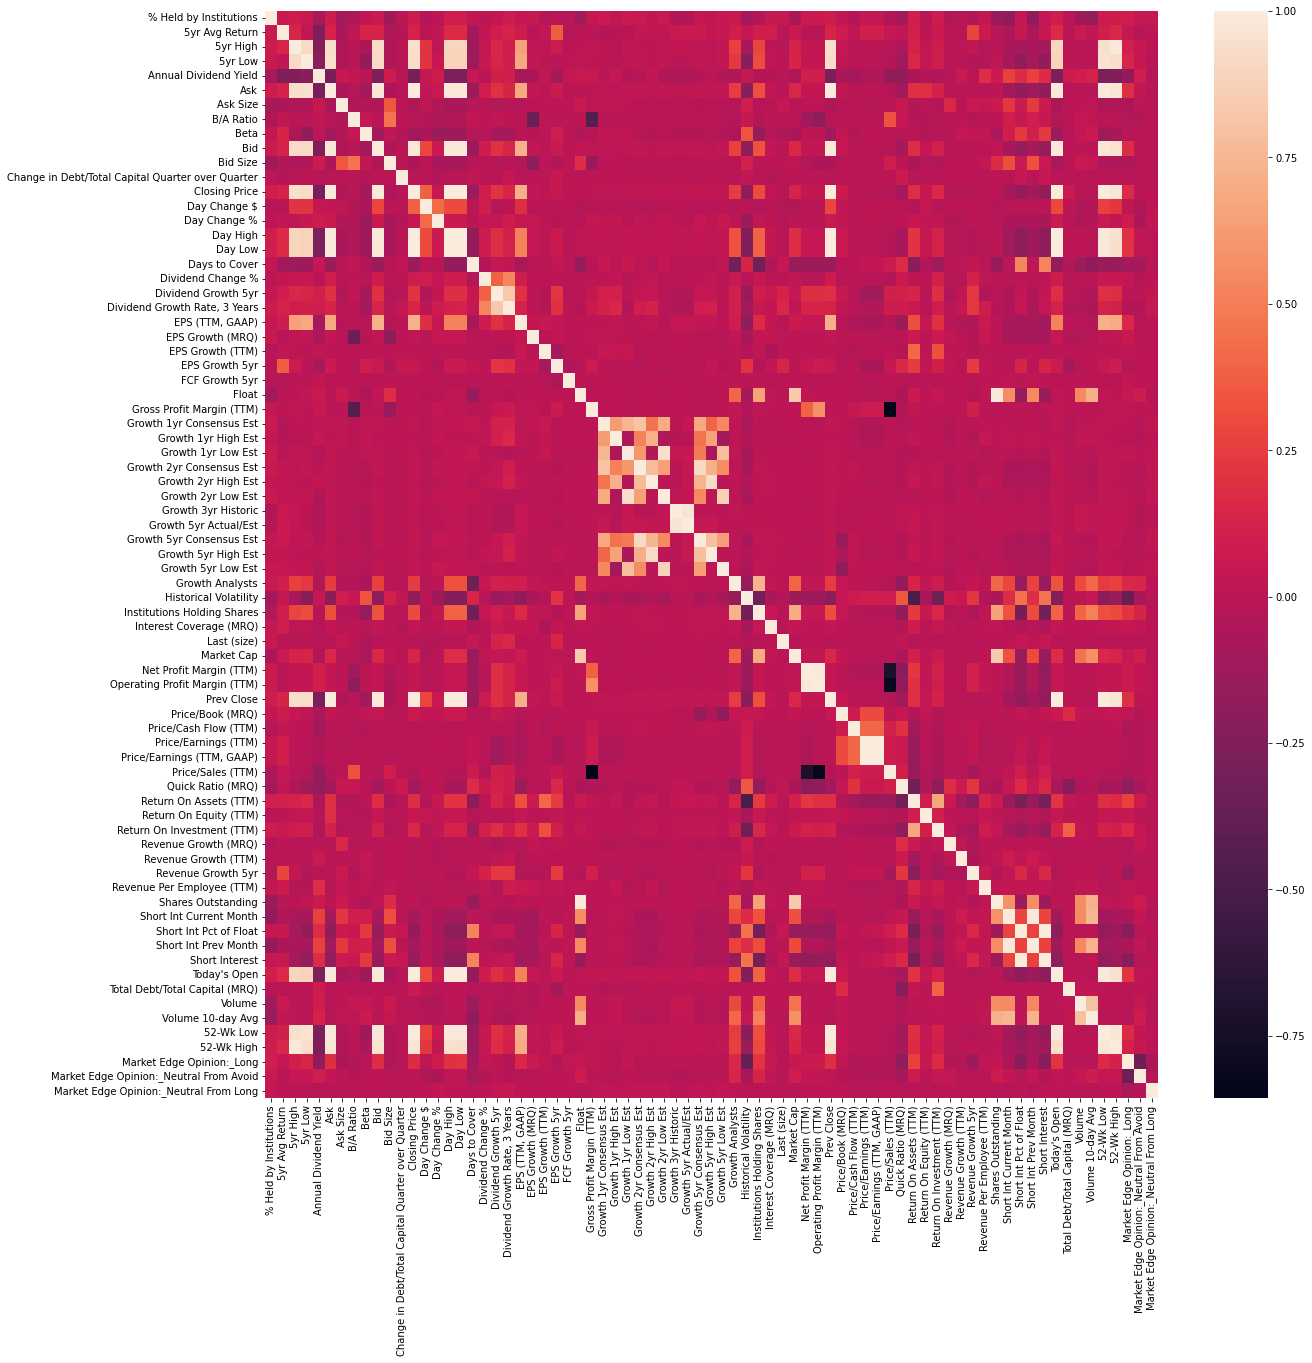

In [53]:
# Remove multicollinearity

import seaborn as sns

# Calculate the correlations between features
corr = X.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr)

Text(0, 0.5, 'Net Profit Margin (TTM)')

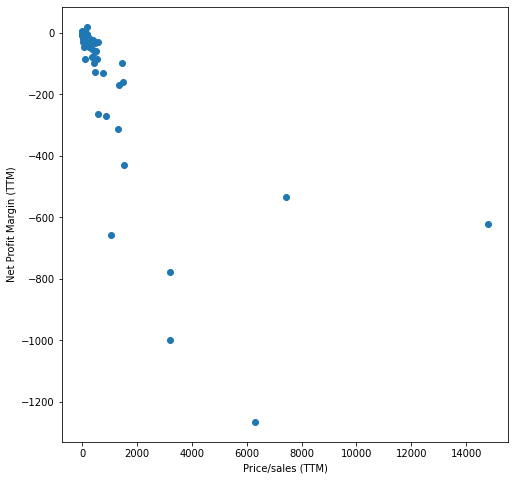

In [54]:
plot_x = X['Price/Sales (TTM)']
plot_y = X['Net Profit Margin (TTM)']

plt.figure(figsize=(8,8))
plt.scatter(plot_x, plot_y)
plt.xlabel('Price/sales (TTM)')
plt.ylabel('Net Profit Margin (TTM)')

Text(0, 0.5, 'Operating Profit Margin (TTM)')

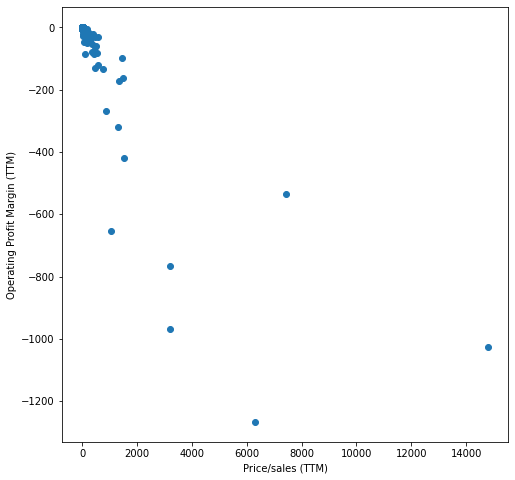

In [55]:
plot_x = X['Price/Sales (TTM)']
plot_y = X['Operating Profit Margin (TTM)']

plt.figure(figsize=(8,8))
plt.scatter(plot_x, plot_y)
plt.xlabel('Price/sales (TTM)')
plt.ylabel('Operating Profit Margin (TTM)')

Text(0, 0.5, 'Annual Dividend Yield')

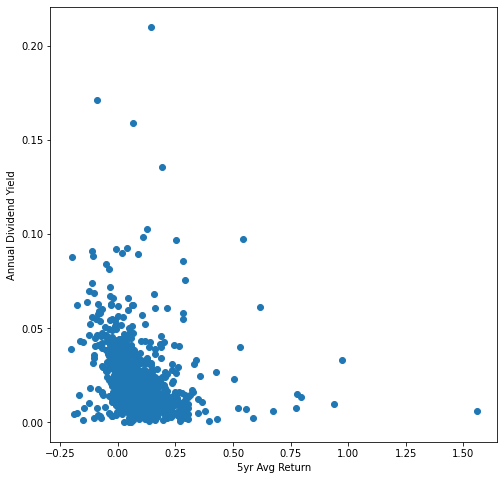

In [56]:
plot_x = X['5yr Avg Return']
plot_y = X['Annual Dividend Yield']

plt.figure(figsize=(8,8))
plt.scatter(plot_x, plot_y)
plt.xlabel('5yr Avg Return')
plt.ylabel('Annual Dividend Yield')

Text(0, 0.5, 'Float')

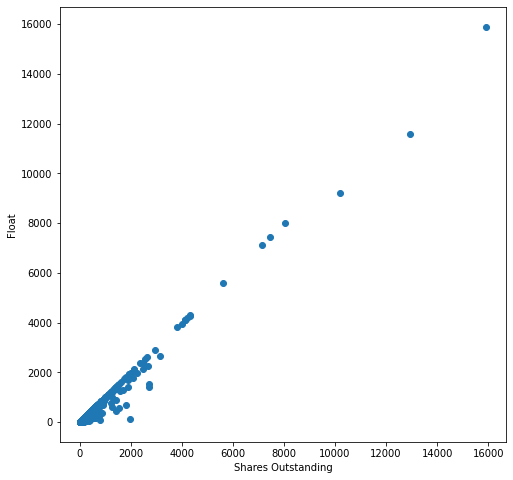

In [57]:
x_name = 'Shares Outstanding'
y_name = 'Float'
plot_x = X[x_name]
plot_y = X[y_name]

plt.figure(figsize=(8,8))
plt.scatter(plot_x, plot_y)
plt.xlabel(x_name)
plt.ylabel(y_name)

There are some features highly correlated, which makes it hard to tell what features are good enough for models. Drop some redudant ones.

In [58]:
X.columns

Index(['% Held by Institutions', '5yr Avg Return', '5yr High', '5yr Low',
       'Annual Dividend Yield', 'Ask', 'Ask Size', 'B/A Ratio', 'Beta', 'Bid',
       'Bid Size', 'Change in Debt/Total Capital Quarter over Quarter',
       'Closing Price', 'Day Change $', 'Day Change %', 'Day High', 'Day Low',
       'Days to Cover', 'Dividend Change %', 'Dividend Growth 5yr',
       'Dividend Growth Rate, 3 Years', 'EPS (TTM, GAAP)', 'EPS Growth (MRQ)',
       'EPS Growth (TTM)', 'EPS Growth 5yr', 'FCF Growth 5yr', 'Float',
       'Gross Profit Margin (TTM)', 'Growth 1yr Consensus Est',
       'Growth 1yr High Est', 'Growth 1yr Low Est', 'Growth 2yr Consensus Est',
       'Growth 2yr High Est', 'Growth 2yr Low Est', 'Growth 3yr Historic',
       'Growth 5yr Actual/Est', 'Growth 5yr Consensus Est',
       'Growth 5yr High Est', 'Growth 5yr Low Est', 'Growth Analysts',
       'Historical Volatility', 'Institutions Holding Shares',
       'Interest Coverage (MRQ)', 'Last (size)', 'Market Cap',
 

In [59]:
X[['Short Int Current Month', 'Short Int Pct of Float', 'Short Int Prev Month', 'Short Interest']]

,Short Int Current Month,Short Int Pct of Float,Short Int Prev Month,Short Interest
A,2889384.0,0.009829,2893740.0,0.0098
AA,10557332.0,0.060221,8646262.0,0.0602
AADI,1061468.0,0.054996,937861.0,0.0550
AAL,91398791.0,0.142367,86494438.0,0.1424
AAN,1727681.0,0.057958,1662342.0,0.0580
...,...,...,...,...
ZTS,4041806.0,0.008695,4264101.0,0.0087
ZUMZ,2225611.0,0.142177,2208120.0,0.1422
ZUO,3387367.0,0.027612,3609137.0,0.0276
ZWS,4104349.0,0.023785,5191703.0,0.0238


In [60]:
X_reduced = X.drop(columns=['5yr High', '5yr Low', 'Ask', 'Bid', 'Closing Price', 'Day High',\
    'Day Low', 'Dividend Growth 5yr', 'Float', 'Price/Earnings (TTM, GAAP)', 'Growth 1yr Consensus Est',\
    'Growth 2yr Consensus Est', 'Growth 5yr Consensus Est', 'Growth 5yr High Est', 'Growth 5yr Low Est',\
    'Operating Profit Margin (TTM)', 'Prev Close', 'Return On Assets (TTM)', "Today's Open", 'Volume', \
    '52-Wk Low', '52-Wk High', 'Short Int Prev Month', 'Short Interest'])

<AxesSubplot:>

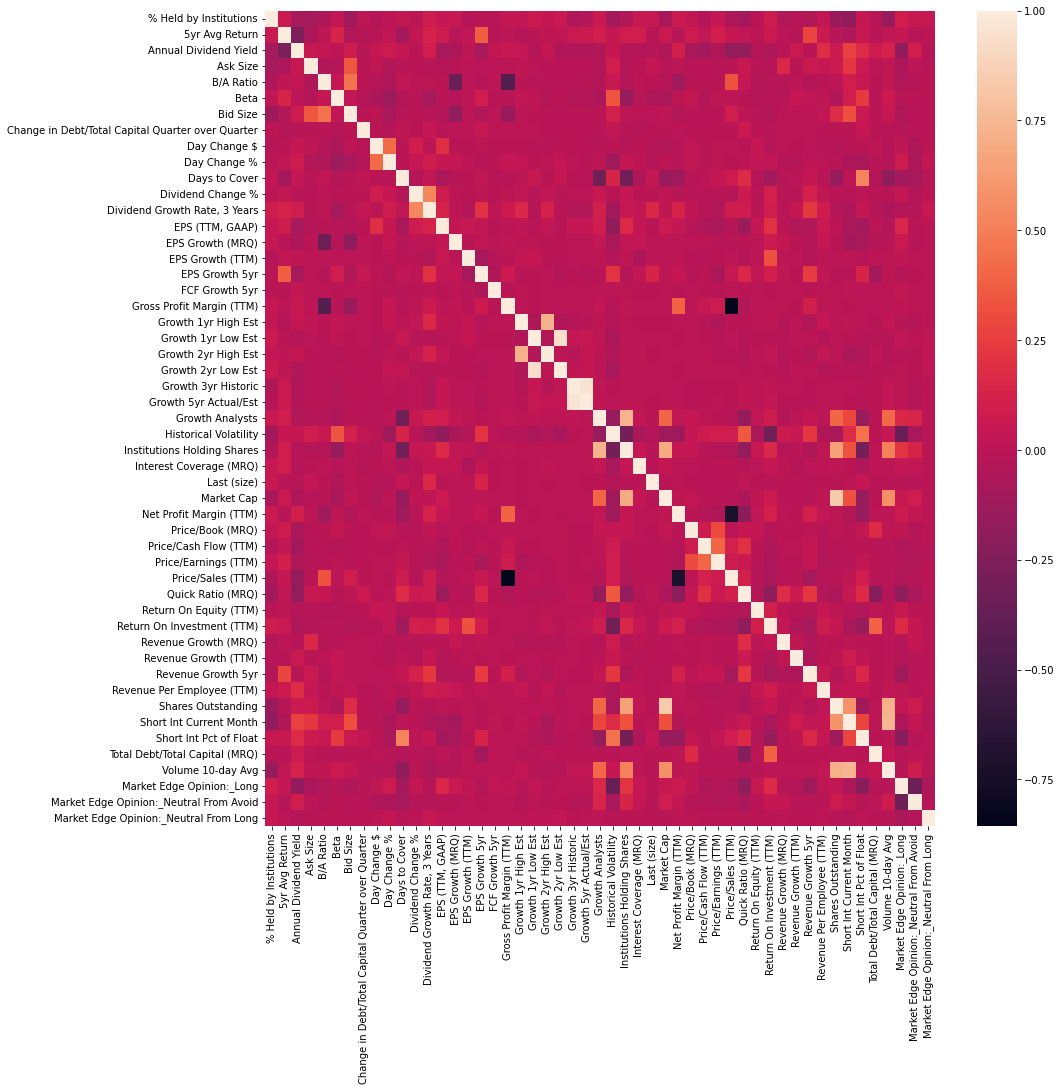

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(X_reduced.corr())

Imputing with IterativeImputer using BayesianRidge estimator
Imputing with IterativeImputer using DecisionTreeRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using ExtraTreesRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using KNeighborsRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


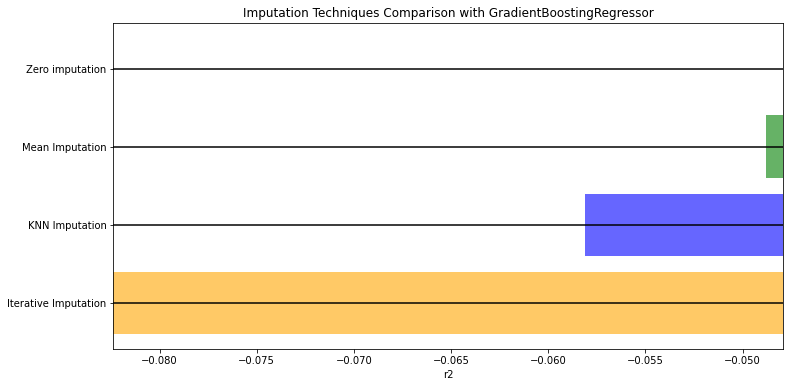

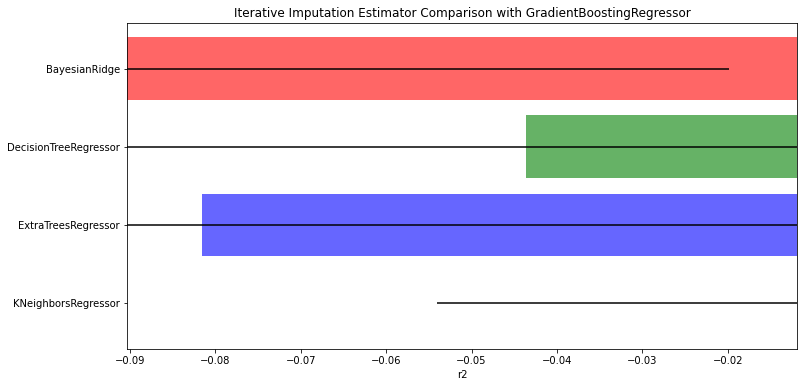

In [62]:
# Creating a list of these estimators with some set params
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='auto', random_state=0),
              ExtraTreesRegressor(n_estimators=10, max_features='sqrt', random_state=0),
              KNeighborsRegressor(n_neighbors=15)
             ]

# Pass our data, regressor, and estimators into wrapper function to get plots
ax1, ax2 = compare_imputer_scores(X_reduced, 
                                  y,
                                  reg, 
                                  scoring='r2', 
                                  iterative_estimators=estimators)

In [63]:
X_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2207 entries, A to ZYXI
Data columns (total 51 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   % Held by Institutions                             2196 non-null   float64
 1   5yr Avg Return                                     2188 non-null   float64
 2   Annual Dividend Yield                              982 non-null    float64
 3   Ask Size                                           2042 non-null   float64
 4   B/A Ratio                                          2042 non-null   float64
 5   Beta                                               1855 non-null   float64
 6   Bid Size                                           2042 non-null   float64
 7   Change in Debt/Total Capital Quarter over Quarter  1837 non-null   float64
 8   Day Change $                                       1864 non-null   float64
 9   Day Change % 

Removing the high correlated features does not improve the model performance.

Let's approach the problem from classification.

In [64]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

### GBClassifier

Imputing with IterativeImputer using BayesianRidge estimator
Imputing with IterativeImputer using DecisionTreeRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using ExtraTreesRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using KNeighborsRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


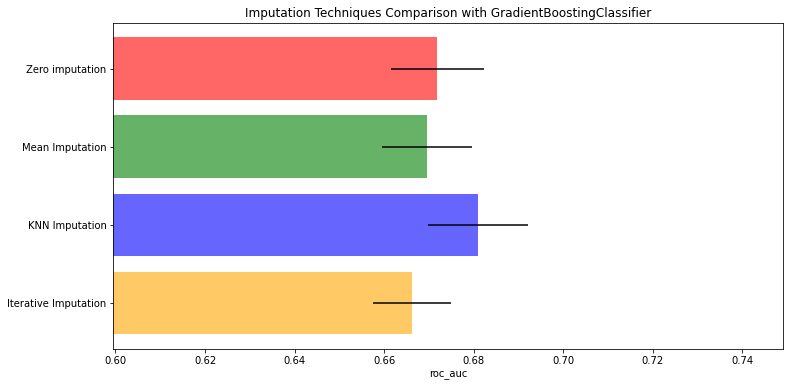

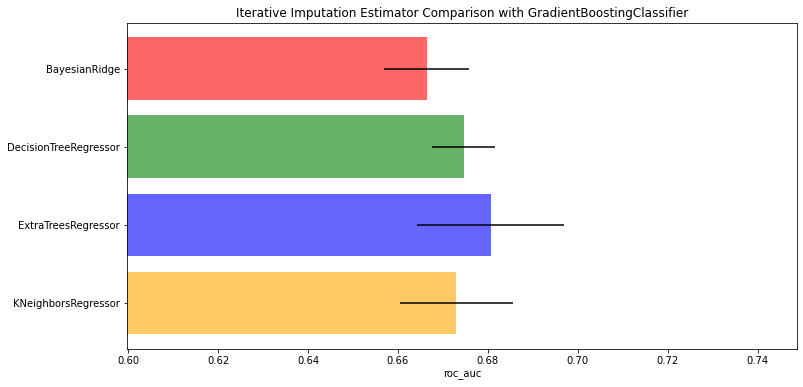

In [65]:
clf = GradientBoostingClassifier()
y = targets.class1

# Creating a list of these estimators with some set params
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='sqrt', random_state=0),
              ExtraTreesRegressor(n_estimators=10, max_features='sqrt', random_state=0),
              KNeighborsRegressor(n_neighbors=15)
             ]

# Pass our data, regressor, and estimators into wrapper function to get plots
ax1, ax2 = compare_imputer_scores(X, 
                                  y,
                                  clf, 
                                  scoring='roc_auc', 
                                  iterative_estimators=estimators)

Imputing with IterativeImputer using BayesianRidge estimator
Imputing with IterativeImputer using DecisionTreeRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using ExtraTreesRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using KNeighborsRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


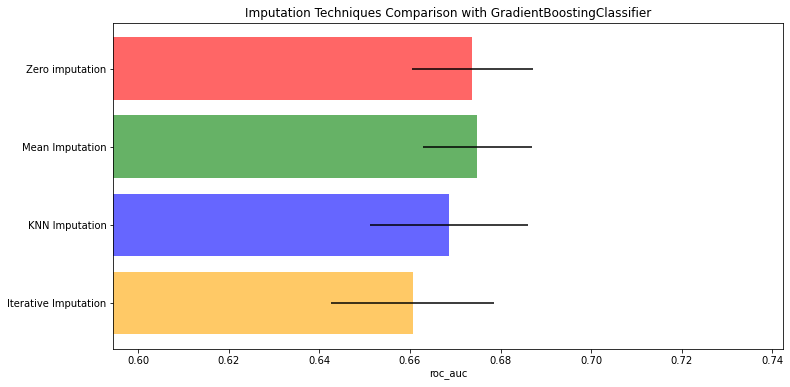

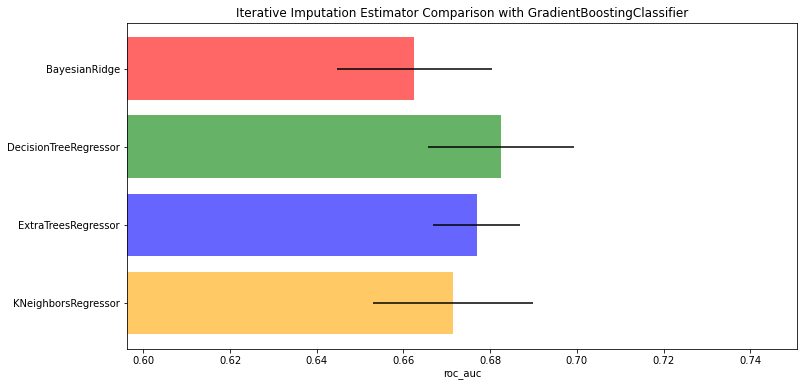

In [66]:
clf = GradientBoostingClassifier()
y = targets.class1

# Creating a list of these estimators with some set params
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='sqrt', random_state=0),
              ExtraTreesRegressor(n_estimators=10, max_features='sqrt', random_state=0),
              KNeighborsRegressor(n_neighbors=15)
             ]

# Pass our data, regressor, and estimators into wrapper function to get plots
ax1, ax2 = compare_imputer_scores(X_reduced, 
                                  y,
                                  clf, 
                                  scoring='roc_auc', 
                                  iterative_estimators=estimators)

It shows that reducing the multicollinearity does not improve the score. Let's compare with other algorithms berfore hyper-tuning.

### ABClassifier

Imputing with IterativeImputer using BayesianRidge estimator
Imputing with IterativeImputer using DecisionTreeRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using ExtraTreesRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using KNeighborsRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


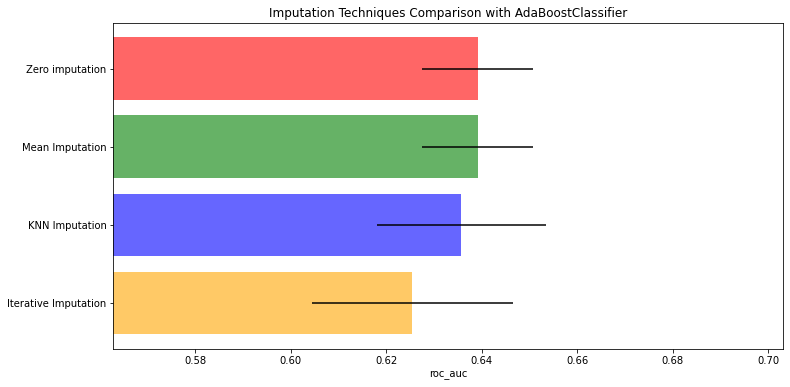

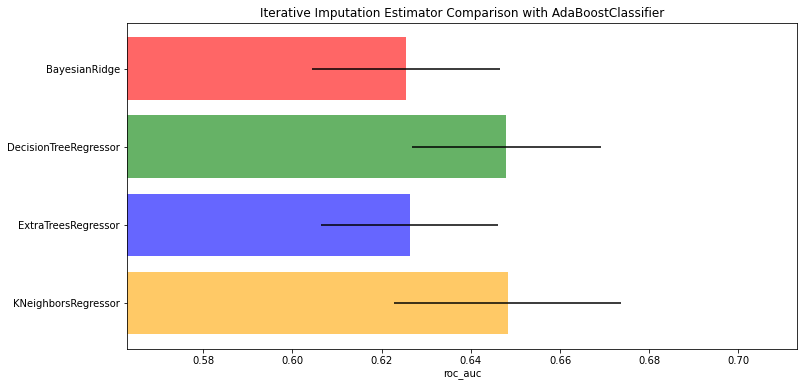

In [67]:
clf = AdaBoostClassifier()
y = targets.class1

# Creating a list of these estimators with some set params
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='sqrt', random_state=0),
              ExtraTreesRegressor(n_estimators=10, max_features='sqrt', random_state=0),
              KNeighborsRegressor(n_neighbors=15)
             ]

# Pass our data, regressor, and estimators into wrapper function to get plots
ax1, ax2 = compare_imputer_scores(X_reduced, 
                                  y,
                                  clf, 
                                  scoring='roc_auc', 
                                  iterative_estimators=estimators)

### KNClassifier

Imputing with IterativeImputer using BayesianRidge estimator
Imputing with IterativeImputer using DecisionTreeRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using ExtraTreesRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using KNeighborsRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


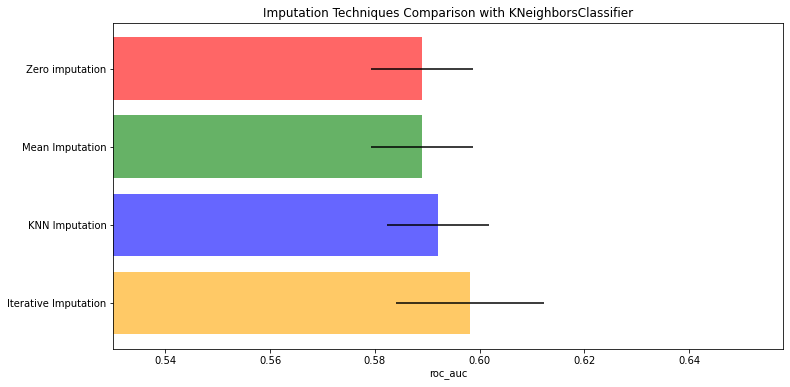

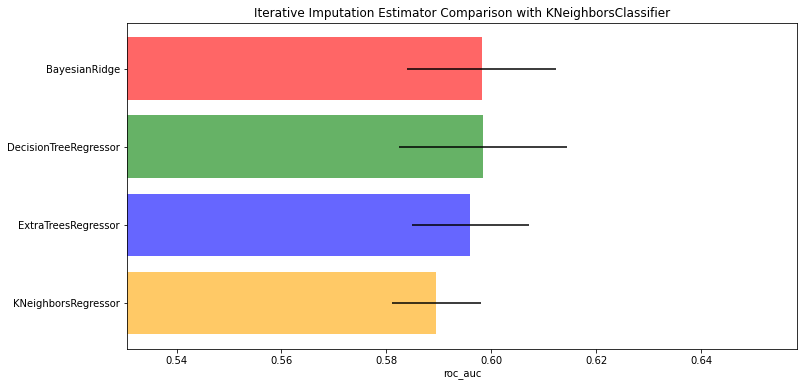

In [68]:
clf = KNeighborsClassifier()
y = targets.class1

# Creating a list of these estimators with some set params
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='sqrt', random_state=0),
              ExtraTreesRegressor(n_estimators=10, max_features='sqrt', random_state=0),
              KNeighborsRegressor(n_neighbors=15)
             ]

# Pass our data, regressor, and estimators into wrapper function to get plots
ax1, ax2 = compare_imputer_scores(X_reduced, 
                                  y,
                                  clf, 
                                  scoring='roc_auc', 
                                  iterative_estimators=estimators)

### RFClassifier

Imputing with IterativeImputer using BayesianRidge estimator
Imputing with IterativeImputer using DecisionTreeRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using ExtraTreesRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using KNeighborsRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


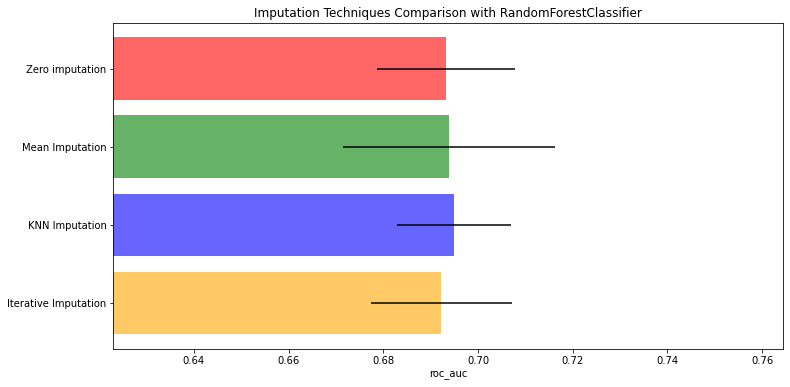

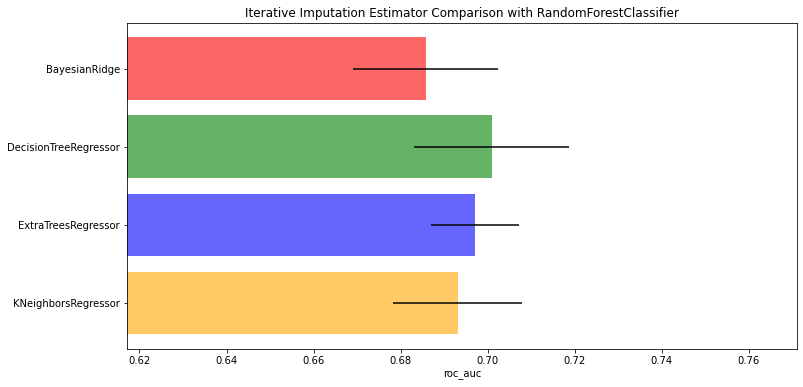

In [69]:
clf = RandomForestClassifier()
y = targets.class1

# Creating a list of these estimators with some set params
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='sqrt', random_state=0),
              ExtraTreesRegressor(n_estimators=10, max_features='sqrt', random_state=0),
              KNeighborsRegressor(n_neighbors=15)
             ]

# Pass our data, regressor, and estimators into wrapper function to get plots
ax1, ax2 = compare_imputer_scores(X_reduced, 
                                  y,
                                  clf, 
                                  scoring='roc_auc', 
                                  iterative_estimators=estimators)

### XGBClassifier

Imputing with IterativeImputer using BayesianRidge estimator
Imputing with IterativeImputer using DecisionTreeRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using ExtraTreesRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using KNeighborsRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


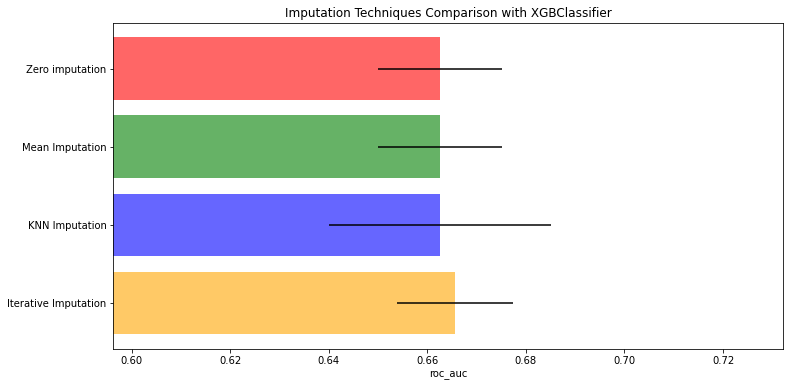

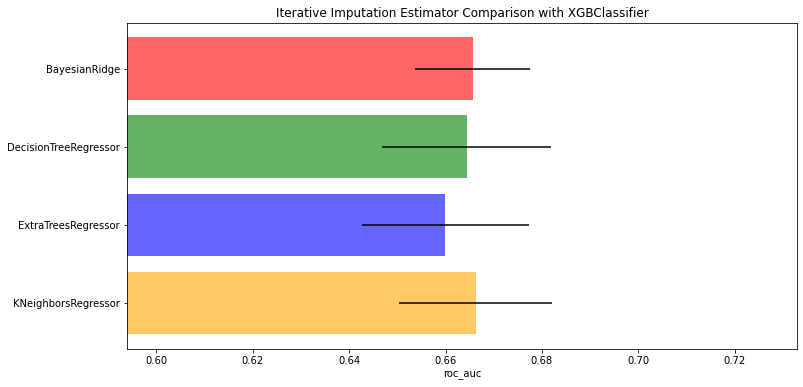

In [70]:
clf = XGBClassifier()
y = targets.class1

# Creating a list of these estimators with some set params
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='sqrt', random_state=0),
              ExtraTreesRegressor(n_estimators=10, max_features='sqrt', random_state=0),
              KNeighborsRegressor(n_neighbors=15)
             ]

# Pass our data, regressor, and estimators into wrapper function to get plots
ax1, ax2 = compare_imputer_scores(X_reduced, 
                                  y,
                                  clf, 
                                  scoring='roc_auc', 
                                  iterative_estimators=estimators)

### XGBRFClassifier

Imputing with IterativeImputer using BayesianRidge estimator
Imputing with IterativeImputer using DecisionTreeRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using ExtraTreesRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using KNeighborsRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


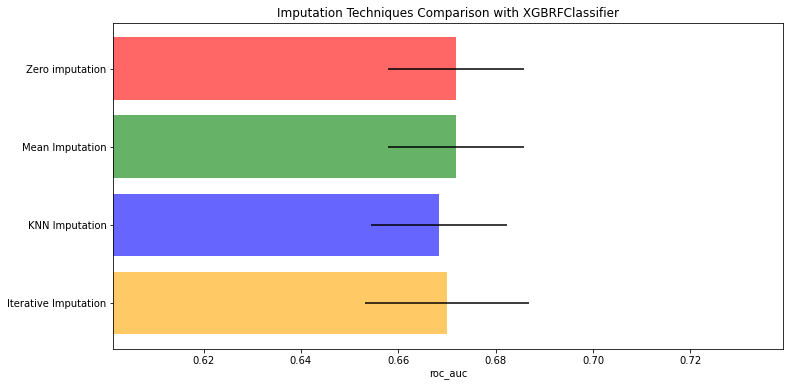

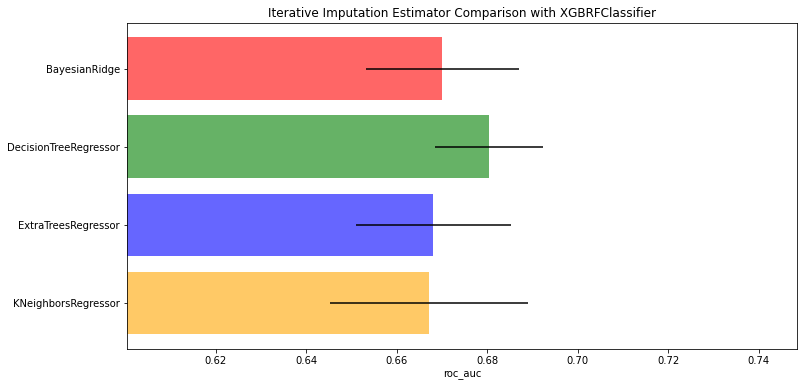

In [71]:
clf = XGBRFClassifier()
y = targets.class1

# Creating a list of these estimators with some set params
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='sqrt', random_state=0),
              ExtraTreesRegressor(n_estimators=10, max_features='sqrt', random_state=0),
              KNeighborsRegressor(n_neighbors=15)
             ]

# Pass our data, regressor, and estimators into wrapper function to get plots
ax1, ax2 = compare_imputer_scores(X_reduced, 
                                  y,
                                  clf, 
                                  scoring='roc_auc', 
                                  iterative_estimators=estimators)

In [72]:
# Establish the target variable and generate a training and holdout set.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Create estimator pipeline to be optimized
scaler = StandardScaler()
imputer = SimpleImputer(strategy='constant', fill_value=0)
clf = GradientBoostingClassifier(random_state=0)
steps = [('scaler', scaler),
         ('imputer', imputer),
         ('clf', clf)
        ]
estimator = Pipeline(steps=steps)

# Make parameter grid to search
param_grid = {'clf__n_estimators': [100, 300, 500, 1000],
              'clf__max_depth': [2, 3, 5, 7],
              'clf__learning_rate': [.001, .01, .1, .5],
              #'clf__booster': ['gbtree', 'gblinear', 'dart'],
              #'clf__reg_alpha': [0, 1],
              #'clf__reg_lambda': [0.25, .5, 0.75, 1],
              'clf__subsample': [.8, 1],
              #'clf__colsample_bytree': [.6, .8, 1],
              #'clf__colsample_bylevel': [.6, .8, 1]
             }

# Make grid search and fit
grid_search = GridSearchCV(estimator, 
                           param_grid=param_grid, 
                           scoring='roc_auc', 
                           cv=5,
                           n_jobs=-2,
                           verbose=2
                          )
gridfit_class1_gb = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


In [73]:
print('Best CV roc_auc score:', gridfit_class1_gb.best_score_)
gridfit_class1_gb.best_estimator_

Best CV roc_auc score: 0.6855135059841231


Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(fill_value=0, strategy='constant')),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=7,
                                            n_estimators=500, random_state=0,
                                            subsample=0.8))])

In [113]:
# Let's calculate the probabilities, and see if there are any relationship with the returns
probas = gridfit_class1_gb.best_estimator_.predict_proba(X_test)

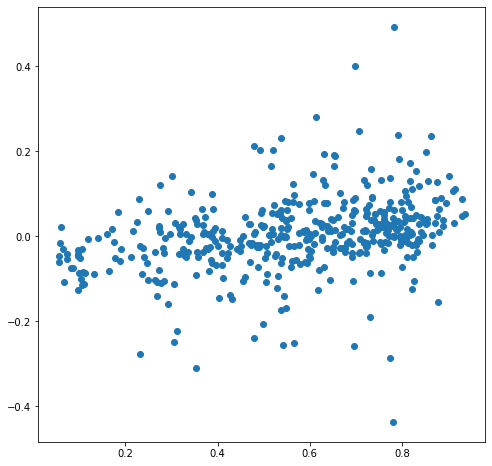

In [114]:
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(probas[:,1], targets.log_return.loc[X_test.index])

Do a linear regression on log returns with this predicted probabilities to see if the relationship is statistically important.

Select the optimal threshold for this model by looking at the roc curve.

c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


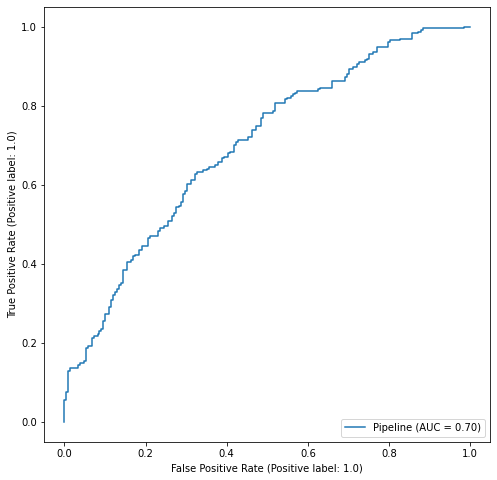

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve

# Plot roc curve
plot_roc_curve(gridfit_class1_gb.best_estimator_, X=X_test, y=y_test)

In [77]:
# Pass in the holdout set and our predicted probabilites
fpr, tpr, threshs = roc_curve(y_test, probas[:, 1])
roc_df = pd.DataFrame([tpr, fpr, threshs]).T
roc_df.columns = ['tpr', 'fpr', 'thresh']
roc_df.head()

,tpr,fpr,thresh
0,0.000000,0.000000,1.935747
1,0.004274,0.000000,0.935747
2,0.055556,0.000000,0.880066
3,0.055556,0.004808,0.877686
4,0.076923,0.004808,0.871100


In [78]:
roc_df[roc_df.tpr > 0.66].head(10)

,tpr,fpr,thresh
106,0.666667,0.389423,0.576753
107,0.666667,0.394231,0.570606
108,0.670940,0.394231,0.566132
109,0.670940,0.403846,0.564708
110,0.679487,0.403846,0.563322
111,0.679487,0.408654,0.560789
112,0.683761,0.408654,0.559306
113,0.683761,0.418269,0.554015
114,0.700855,0.418269,0.549693
115,0.700855,0.423077,0.549427


In [79]:
# Generate predictions with standard threshold of 0.5 and print accuracy
preds = gridfit_class1_gb.best_estimator_.predict(X_test)
print('Accuracy Score with Standard Threshold:', accuracy_score(y_test, preds))

# Generate predictions with selected threshold and print accuracy
thresh = roc_df.thresh[100]
preds = (probas[:, 1] > thresh).astype('int')
print('Accuracy Score with Selected Threshold:', accuracy_score(y_test, preds))

Accuracy Score with Standard Threshold: 0.6447963800904978
Accuracy Score with Selected Threshold: 0.6425339366515838


Compare the result with randomly picking a stock of which price goes up.

In [80]:
sum(targets.class1) / len(targets)

0.551880380607159

It reveals that most of stock price go up during this period, thus, random picking still has 92% on rising stocks.

The score is ~ 91%. It actually does not tell much since the opportunity of randomly selecting a rising stock is about 92%

Check the feature importances for this model.

Text(0.5, 1.0, 'Feature Importance (MDI)')

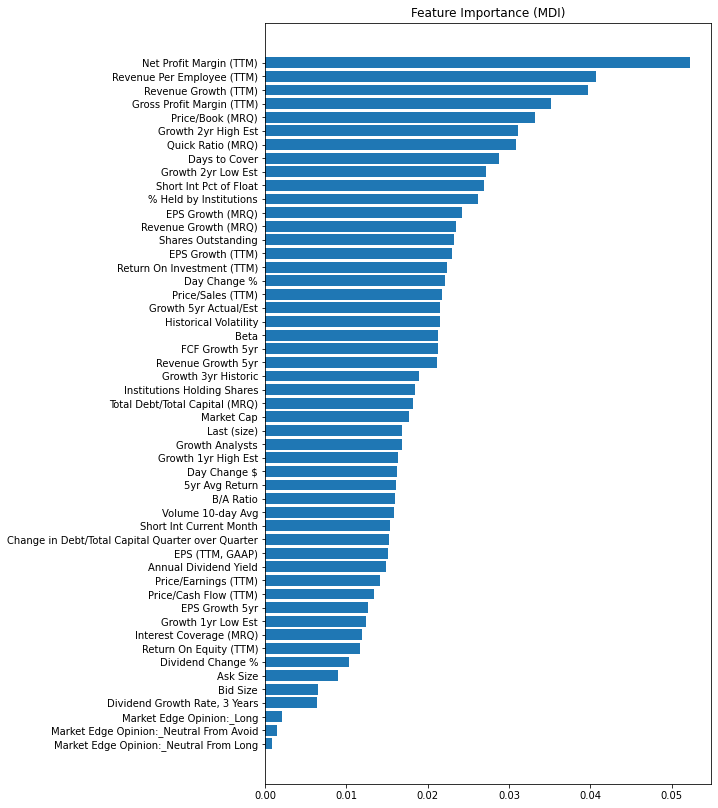

In [81]:
feature_importance = gridfit_class1_gb.best_estimator_.steps[2][1].feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 14))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_reduced.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

We can use permutation importance to see how these features contribute to the predictive accuracy of the holdout sets.

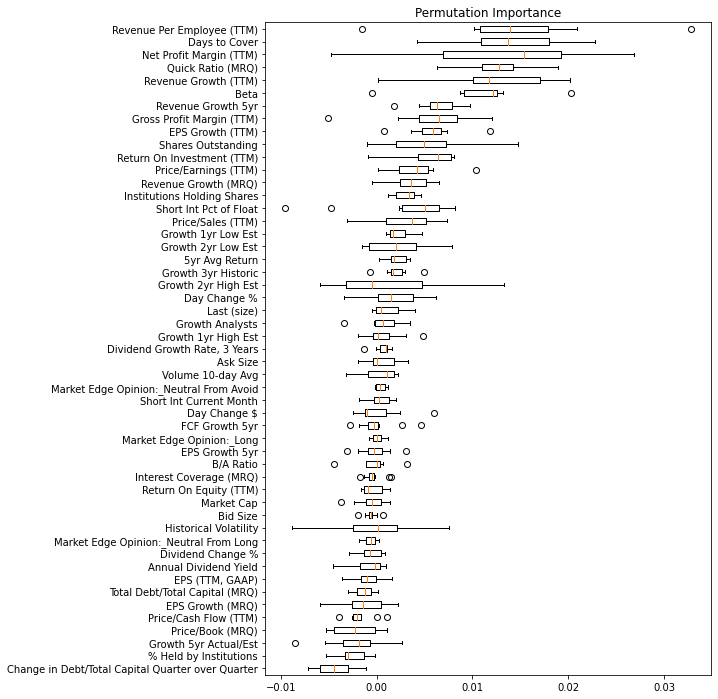

In [82]:
from sklearn.inspection import permutation_importance

# Generate and plot permutation importances on holdout set
result = permutation_importance(gridfit_class1_gb.best_estimator_, 
                                X_test, 
                                y_test, 
                                scoring='roc_auc',
                                n_repeats=10,
                                random_state=42, 
                                n_jobs=-1)
sorted_idx = result.importances_mean.argsort()
fig = plt.figure(figsize=(8,12))
plt.subplot(1, 1, 1)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X_reduced.columns)[sorted_idx])
plt.title("Permutation Importance")
plt.show()

Let's see the model performance on targets with removing the averaged price.

### GBClassifier

Imputing with IterativeImputer using BayesianRidge estimator
Imputing with IterativeImputer using DecisionTreeRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using ExtraTreesRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using KNeighborsRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


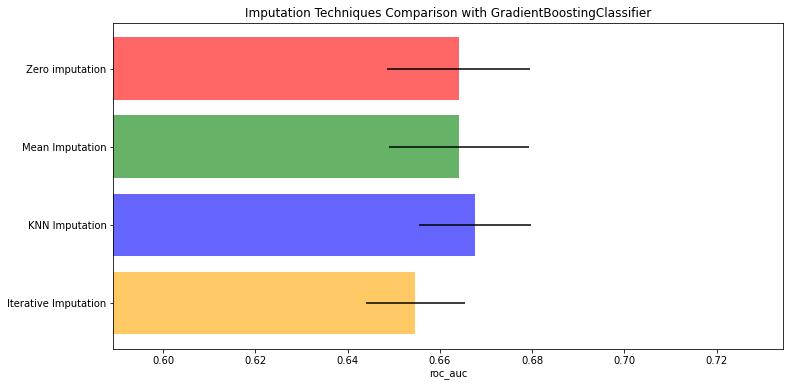

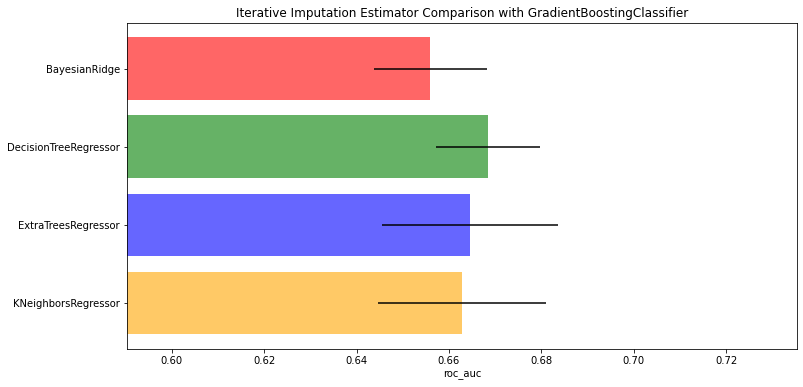

In [83]:
clf = GradientBoostingClassifier()
y = targets.class2

# Creating a list of these estimators with some set params
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='sqrt', random_state=0),
              ExtraTreesRegressor(n_estimators=10, max_features='sqrt', random_state=0),
              KNeighborsRegressor(n_neighbors=15)
             ]

# Pass our data, regressor, and estimators into wrapper function to get plots
ax1, ax2 = compare_imputer_scores(X_reduced, 
                                  y,
                                  clf, 
                                  scoring='roc_auc', 
                                  iterative_estimators=estimators)

### ABClassifier

Imputing with IterativeImputer using BayesianRidge estimator
Imputing with IterativeImputer using DecisionTreeRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using ExtraTreesRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using KNeighborsRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


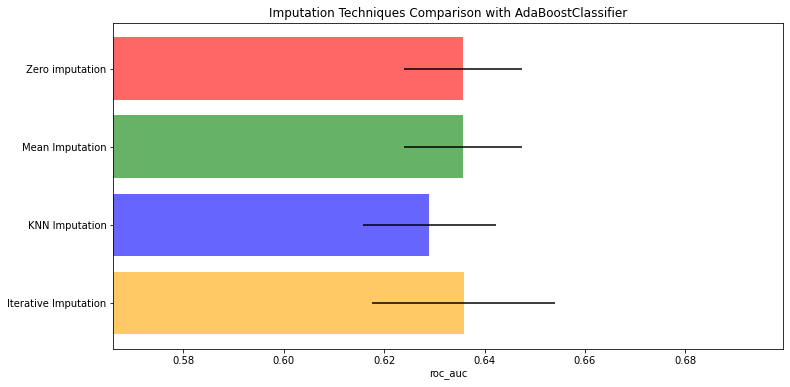

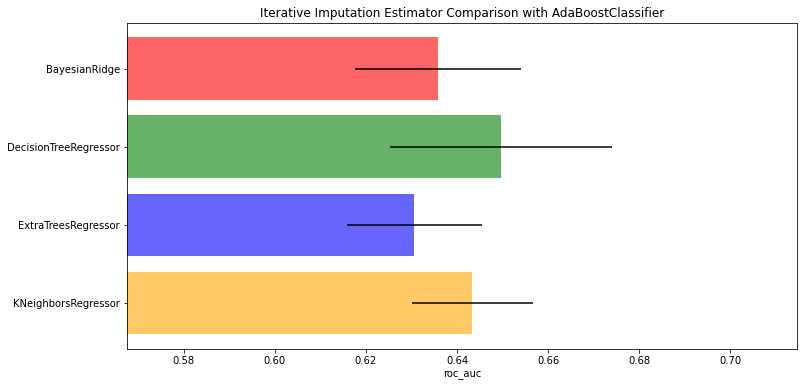

In [84]:
clf = AdaBoostClassifier()
y = targets.class2

# Creating a list of these estimators with some set params
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='sqrt', random_state=0),
              ExtraTreesRegressor(n_estimators=10, max_features='sqrt', random_state=0),
              KNeighborsRegressor(n_neighbors=15)
             ]

# Pass our data, regressor, and estimators into wrapper function to get plots
ax1, ax2 = compare_imputer_scores(X_reduced, 
                                  y,
                                  clf, 
                                  scoring='roc_auc', 
                                  iterative_estimators=estimators)

### KNClassifier

Imputing with IterativeImputer using BayesianRidge estimator
Imputing with IterativeImputer using DecisionTreeRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using ExtraTreesRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using KNeighborsRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


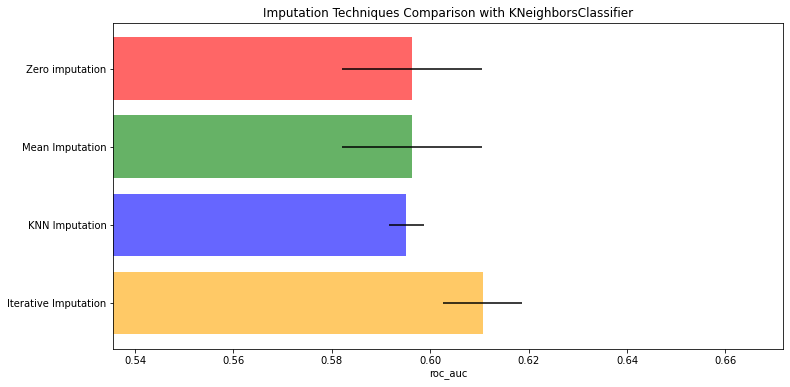

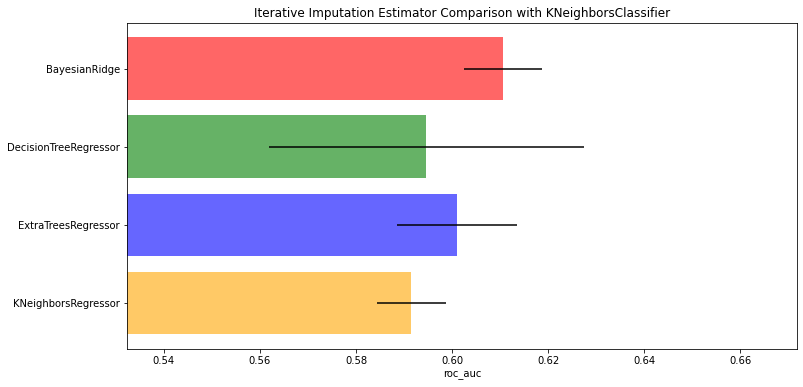

In [85]:
clf = KNeighborsClassifier()
y = targets.class2

# Creating a list of these estimators with some set params
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='sqrt', random_state=0),
              ExtraTreesRegressor(n_estimators=10, max_features='sqrt', random_state=0),
              KNeighborsRegressor(n_neighbors=15)
             ]

# Pass our data, regressor, and estimators into wrapper function to get plots
ax1, ax2 = compare_imputer_scores(X_reduced, 
                                  y,
                                  clf, 
                                  scoring='roc_auc', 
                                  iterative_estimators=estimators)

### RFClassifier

Imputing with IterativeImputer using BayesianRidge estimator
Imputing with IterativeImputer using DecisionTreeRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using ExtraTreesRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using KNeighborsRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


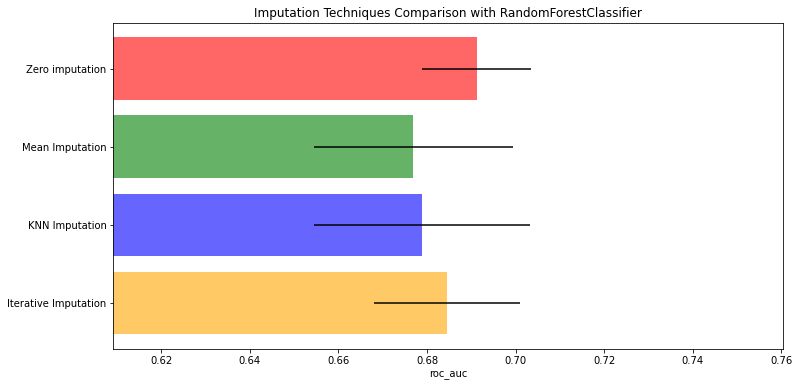

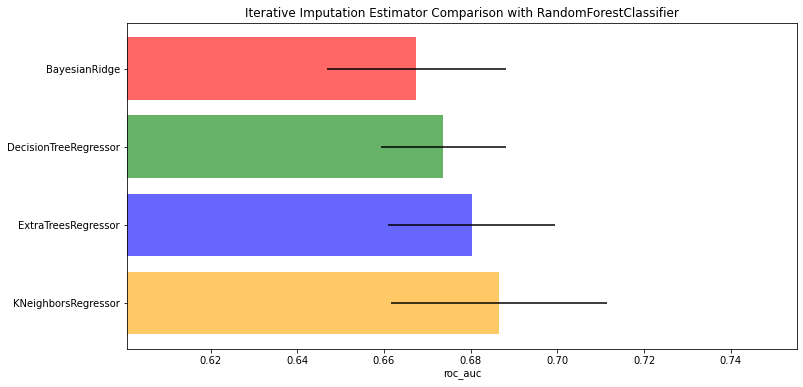

In [86]:
clf = RandomForestClassifier()
y = targets.class2

# Creating a list of these estimators with some set params
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='sqrt', random_state=0),
              ExtraTreesRegressor(n_estimators=10, max_features='sqrt', random_state=0),
              KNeighborsRegressor(n_neighbors=15)
             ]

# Pass our data, regressor, and estimators into wrapper function to get plots
ax1, ax2 = compare_imputer_scores(X_reduced, 
                                  y,
                                  clf, 
                                  scoring='roc_auc', 
                                  iterative_estimators=estimators)

### XGBClassifier

Imputing with IterativeImputer using BayesianRidge estimator
Imputing with IterativeImputer using DecisionTreeRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using ExtraTreesRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using KNeighborsRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


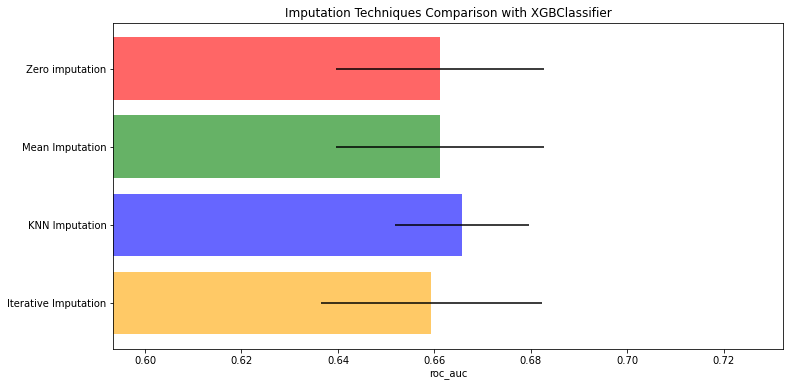

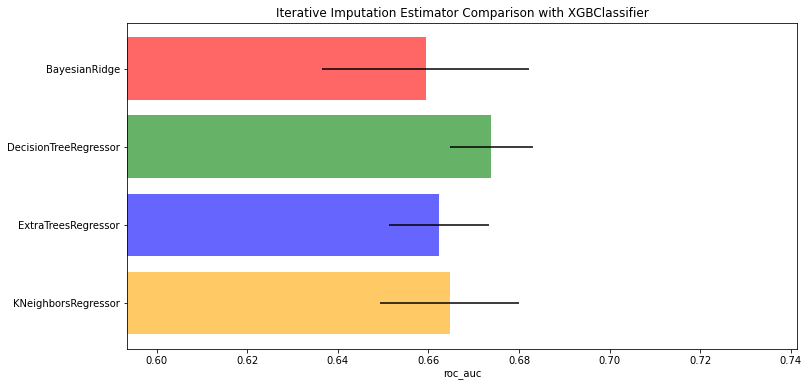

In [87]:
clf = XGBClassifier()
y = targets.class2

# Creating a list of these estimators with some set params
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='sqrt', random_state=0),
              ExtraTreesRegressor(n_estimators=10, max_features='sqrt', random_state=0),
              KNeighborsRegressor(n_neighbors=15)
             ]

# Pass our data, regressor, and estimators into wrapper function to get plots
ax1, ax2 = compare_imputer_scores(X_reduced, 
                                  y,
                                  clf, 
                                  scoring='roc_auc', 
                                  iterative_estimators=estimators)

### XGBRFClassifier

Imputing with IterativeImputer using BayesianRidge estimator
Imputing with IterativeImputer using DecisionTreeRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using ExtraTreesRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using KNeighborsRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


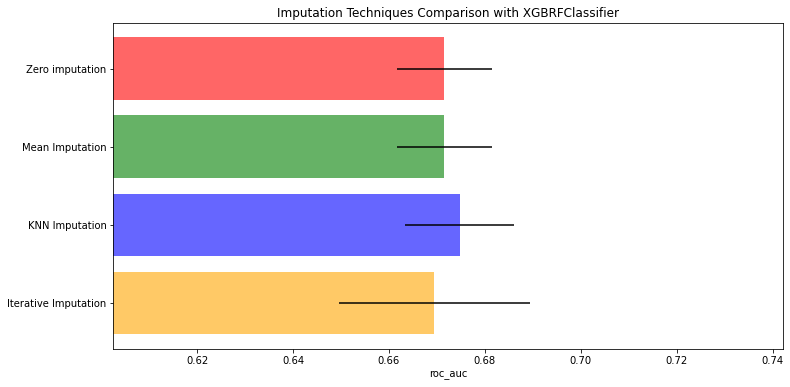

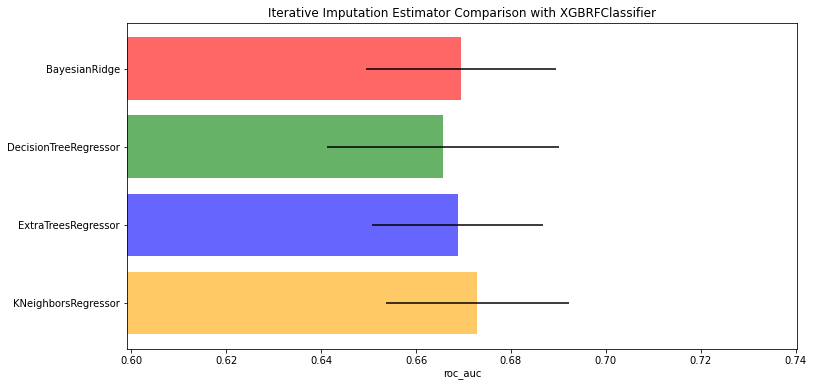

In [88]:
clf = XGBRFClassifier()
y = targets.class2

# Creating a list of these estimators with some set params
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='sqrt', random_state=0),
              ExtraTreesRegressor(n_estimators=10, max_features='sqrt', random_state=0),
              KNeighborsRegressor(n_neighbors=15)
             ]

# Pass our data, regressor, and estimators into wrapper function to get plots
ax1, ax2 = compare_imputer_scores(X_reduced, 
                                  y,
                                  clf, 
                                  scoring='roc_auc', 
                                  iterative_estimators=estimators)

XGRFClassifier performs the best with constant imputating. I'd like to check the performance on original features.

Imputing with IterativeImputer using BayesianRidge estimator
Imputing with IterativeImputer using DecisionTreeRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using ExtraTreesRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing with IterativeImputer using KNeighborsRegressor estimator


c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


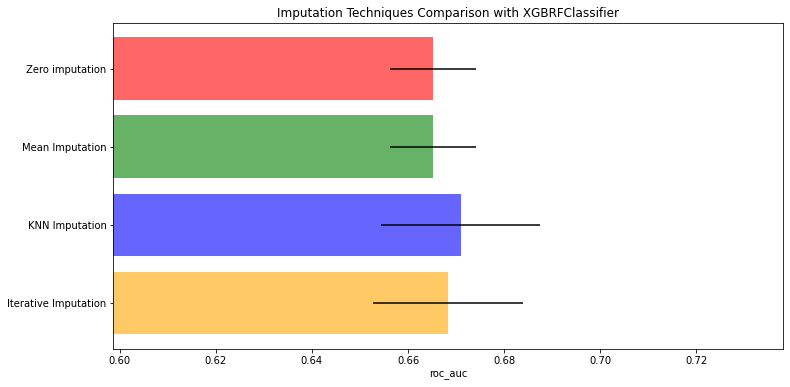

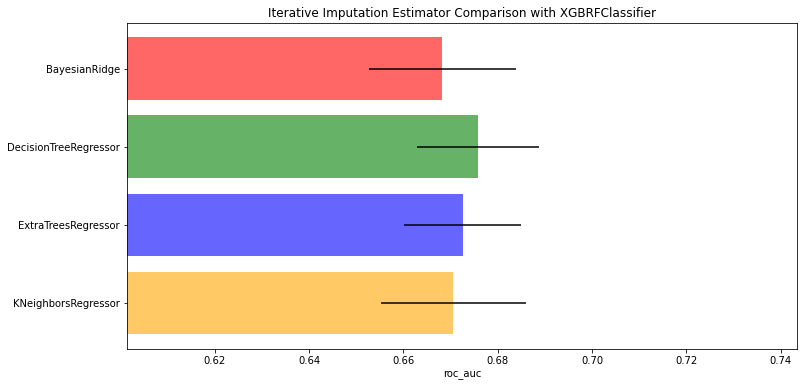

In [89]:
clf = XGBRFClassifier()
y = targets.class2

# Creating a list of these estimators with some set params
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='sqrt', random_state=0),
              ExtraTreesRegressor(n_estimators=10, max_features='sqrt', random_state=0),
              KNeighborsRegressor(n_neighbors=15)
             ]

# Pass our data, regressor, and estimators into wrapper function to get plots
ax1, ax2 = compare_imputer_scores(X, 
                                  y,
                                  clf, 
                                  scoring='roc_auc', 
                                  iterative_estimators=estimators)

The perfomance is still not that difference from reduced feature sets.

In [90]:
# Generate training and holdout (testing) set
y = targets.class2
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Create pipeline with scaler, imputer, and classifier
scaler = StandardScaler()
imputer = SimpleImputer()
# imputer = KNNImputer(missing_values=np.nan, 
#                          add_indicator=True, 
#                          n_neighbors=5,
#                          weights='distance')
clf = XGBRFClassifier(n_jobs=-1, random_state=0)

steps = [('scaler', scaler),
         ('imputer', imputer),
         ('clf', clf)
        ]
estimator = Pipeline(steps=steps)

# Create parameter grid for Grid Search
param_grid = {'clf__max_depth': [3, 5, 7],
              'clf__learning_rate': [.01, .1, .5],
              'clf__n_estimators': [100, 300, 500],
              'clf__subsample': [0.8, 1.0],
              'clf__colsample_bytree': [0.8, 1.0],
              'clf__colsample_bylevel': [0.8, 1.0],
              'clf__colsample_bynode': [0.8, 1.0],
        #       'clf__reg_lambda': [.25, .5, .75, 1]
             }

# Create Grid Search and fit to train data
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid,
                           scoring='roc_auc',
                           n_jobs=-2,
                           cv=5,
                           verbose=2
                          )
gridfit_class2_xgbrf = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [91]:
print('Best CV training score:', gridfit_class2_xgbrf.best_score_)
gridfit_class2_xgbrf.best_estimator_

Best CV training score: 0.6839300878988682


Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer()),
                ('clf',
                 XGBRFClassifier(base_score=0.5, booster='gbtree',
                                 callbacks=None, colsample_bylevel=0.8,
                                 colsample_bytree=0.8,
                                 early_stopping_rounds=None,
                                 enable_categorical=False, eval_metric=None,
                                 feature_types=None, gamma=0, gpu_id=-1,
                                 grow_policy='depthwise', importance_type=None,
                                 interaction_constraints='', learning_rate=0.01,
                                 max_bin=256, max_cat_threshold=64,
                                 max_cat_to_onehot=4, max_delta_step=0,
                                 max_depth=7, max_leaves=0, min_child_weight=1,
                                 missing=nan, monotone_constraints='()',
                                 n_estima

In [92]:
# Let's calculate the probabilities, and see if there are any relationship with the returns
probas = gridfit_class2_xgbrf.best_estimator_.predict_proba(X_test)

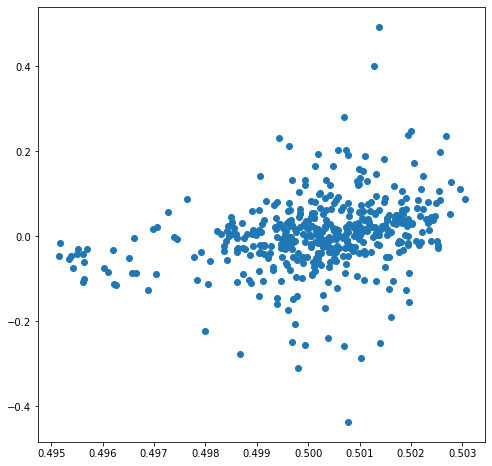

In [93]:
plt.scatter(probas[:,1], targets.log_return.loc[X_test.index])

Do a linear regression on log returns with this predicted probabilities to see if the relationship is statistically important.

Select the optimal threshold for this model by looking at the roc curve.

c:\Users\USER\miniconda3\envs\numerai\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


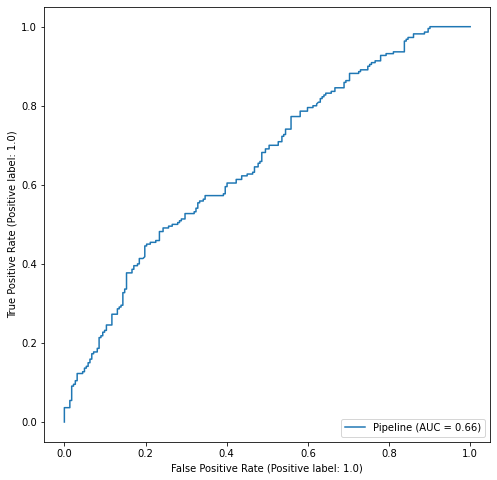

In [94]:
# Plot roc curve
plot_roc_curve(gridfit_class2_xgbrf.best_estimator_, X=X_test, y=y_test)

In [95]:
# Pass in the holdout set and our predicted probabilites
fpr, tpr, threshs = roc_curve(y_test, probas[:, 1])
roc_df = pd.DataFrame([tpr, fpr, threshs]).T
roc_df.columns = ['tpr', 'fpr', 'thresh']
roc_df.head()

,tpr,fpr,thresh
0,0.000000,0.000000,1.503044
1,0.004545,0.000000,0.503044
2,0.036364,0.000000,0.502552
3,0.036364,0.013514,0.502507
4,0.054545,0.013514,0.502385


In [96]:
roc_df[roc_df.tpr > 0.66].head(10)

,tpr,fpr,thresh
119,0.681818,0.486486,0.500115
120,0.681818,0.495495,0.500095
121,0.690909,0.495495,0.500078
122,0.690909,0.504505,0.500066
123,0.700000,0.504505,0.500055
124,0.700000,0.527027,0.500032
125,0.709091,0.527027,0.499996
126,0.709091,0.536036,0.499967
127,0.722727,0.536036,0.499945
128,0.722727,0.540541,0.499944


In [97]:
# Generate predictions with standard threshold of 0.5 and print accuracy
preds = gridfit_class2_xgbrf.best_estimator_.predict(X_test)
print('Accuracy Score with Standard Threshold:', accuracy_score(y_test, preds))

# Generate predictions with selected threshold and print accuracy
thresh = roc_df.thresh[100]
preds = (probas[:, 1] > thresh).astype('int')
print('Accuracy Score with Selected Threshold:', accuracy_score(y_test, preds))

Accuracy Score with Standard Threshold: 0.5882352941176471
Accuracy Score with Selected Threshold: 0.5927601809954751


In [98]:
sum(targets.class2) / len(targets)

0.5092886270956049

Good! Both of them are better than the random picking. Looks like the model training on the price difference with market's performs quite well even in this short period.

Text(0.5, 1.0, 'Feature Importance (MDI)')

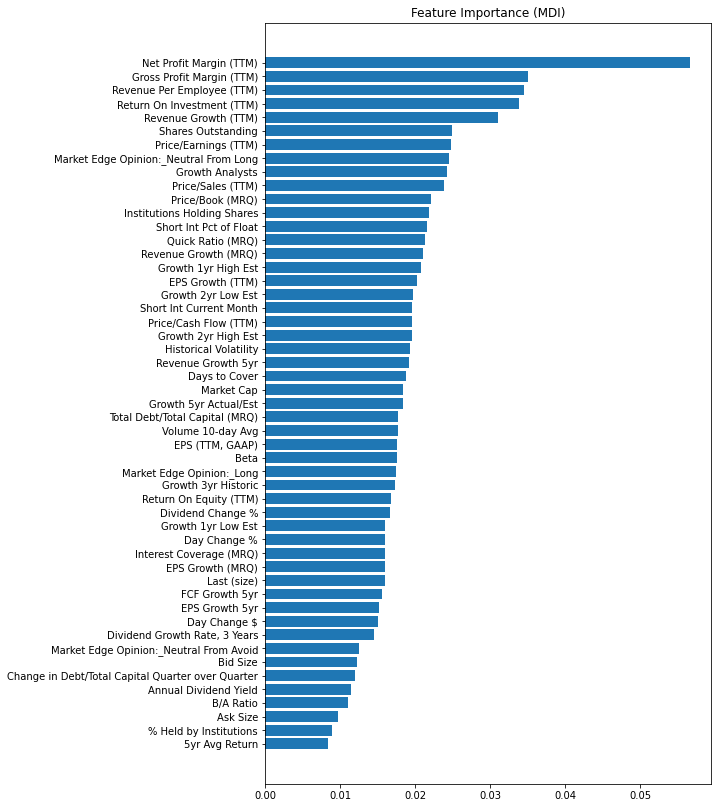

In [99]:
feature_importance = gridfit_class2_xgbrf.best_estimator_.steps[2][1].feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 14))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_reduced.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

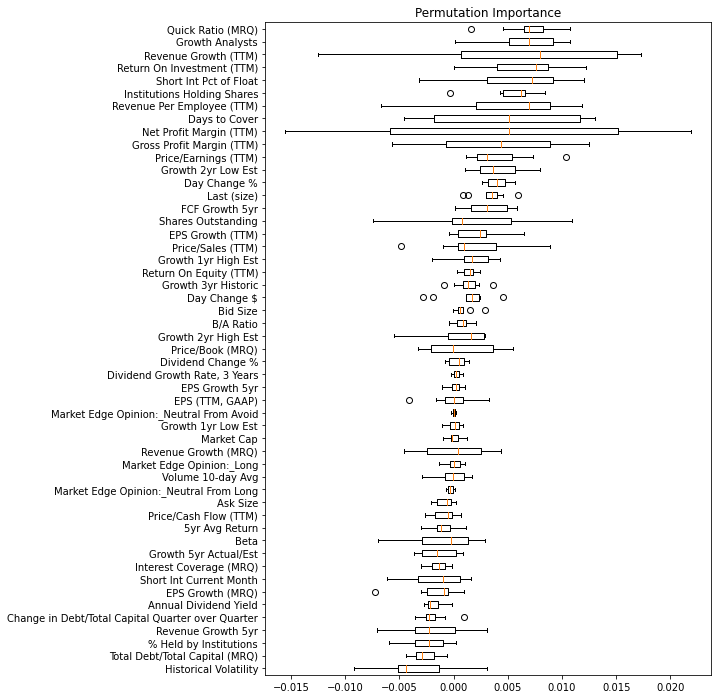

In [100]:
# Generate and plot permutation importances on holdout set
result = permutation_importance(gridfit_class2_xgbrf.best_estimator_, 
                                X_test, 
                                y_test, 
                                scoring='roc_auc',
                                n_repeats=10,
                                random_state=42, 
                                n_jobs=-1)
sorted_idx = result.importances_mean.argsort()
fig = plt.figure(figsize=(8,12))
plt.subplot(1, 1, 1)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X_reduced.columns)[sorted_idx])
plt.title("Permutation Importance")
plt.show()

The result shows

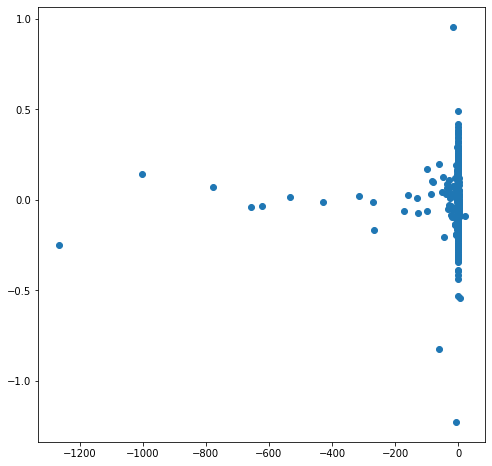

In [112]:
plt.scatter(X_reduced['Net Profit Margin (TTM)'], targets.log_return)

Construct a portfolio

In [102]:
# Create pd Series that containing predictions with labels
preds_series = pd.Series(preds, index=y_test.index)
# Combine the corresponding log returns into a pd Dataframe
returns_preds_df = pd.concat([targets.log_return.loc[y_test.index], preds_series], axis=1)
# Name the columns
returns_preds_df.columns = ['log_return', 'pred']

# Create a new column of return multiplier for deciding if long/short the stock based on the prediction
returns_preds_df['return_multiplier'] = returns_preds_df.pred.map( lambda x: 1 if x == 1 else -1)
returns_preds_df.head()

,log_return,pred,return_multiplier
SNA,-0.010612,1,1
SWTX,0.023780,0,-1
SB,-0.021429,1,1
CLF,0.054207,0,-1
SKIN,0.032660,0,-1


In [103]:
# Constructing the returns of a portfolio which takes equal dollar value positions in each stock of the holdout set.
portfolio_return = np.mean(returns_preds_df['log_return'] * returns_preds_df['return_multiplier'])
print('Portfolio Return (test set):', portfolio_return)

market_return = returns_preds_df['log_return'].mean()
print('Market Return (test set):', market_return)

Portfolio Return (test set): 0.019508833846053425
Market Return (test set): 0.003827579377378547


It shows that the hedging strategy does not work well in comparison with just buy-and-hold. It is the fact the overall market is in uptrend since the scraping time. However, at least it keeps the portfolio from being loss. Let's simulate if the market is going a downtrend.

In [104]:
# Create a new column of bad market return by subtracting 2 times of market average returns to each stock.
returns_preds_df['bad_market_return'] = returns_preds_df['log_return'] - 2 * returns_preds_df['log_return'].mean()

# Compare the portfolio with the market returns again
portfolio_return2 = np.mean(returns_preds_df['bad_market_return'] * returns_preds_df['return_multiplier'])
print('Portfolio Return (test set):', portfolio_return2)
market_return2 = returns_preds_df['bad_market_return'].mean()
print('Market Return (test set):', market_return2)

Portfolio Return (test set): 0.019751304937833062
Market Return (test set): -0.0038275793773785427


In [105]:
# Visualize the performance of the strategy
log_returns_full = log_close.diff()

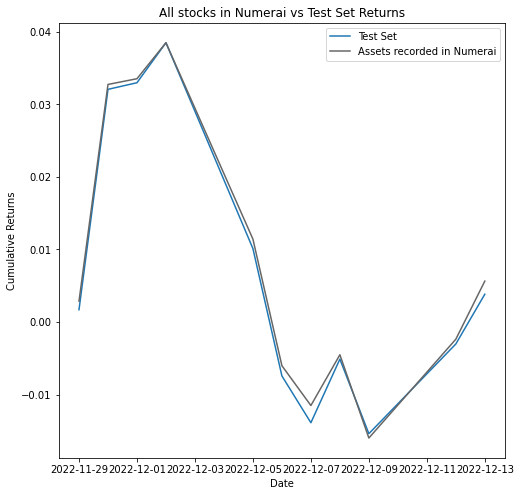

In [106]:
# Cumulative sum represents the cumulative returns over time
# Plotting the entrie stock average vs the test set
plt.plot(log_returns_full[y_test.index].mean(axis=1).cumsum(), label='Test Set')
plt.plot(log_returns_full.mean(axis=1).cumsum(), c='#666666', label='Assets recorded in Numerai')
plt.title('All stocks in Numerai vs Test Set Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()

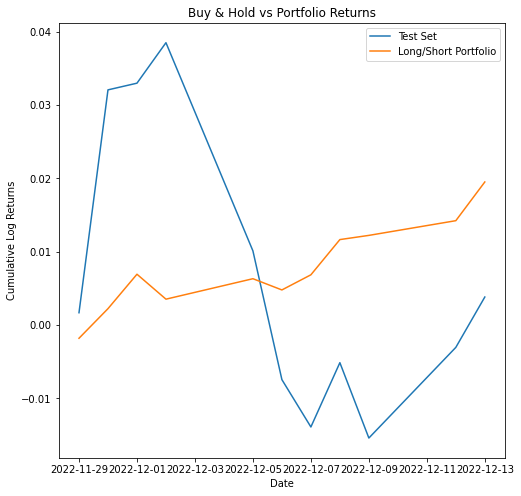

In [107]:
# Separate the long and short positions of our portfolio
long_tickers = returns_preds_df[returns_preds_df.pred == 1].index
short_tickers = returns_preds_df[returns_preds_df.pred == 0].index
long_positions = log_returns_full[long_tickers]
short_positions = log_returns_full[short_tickers]

# Combine long and short positions to make portfolio, reversing sign of short positions
full_portfolio_returns = pd.concat([long_positions, -short_positions], axis=1)

# Plot Buy & Hold Strategy vs Portfolio
plt.plot(log_returns_full[y_test.index].mean(axis=1).cumsum(), label='Test Set')
plt.plot(full_portfolio_returns.mean(axis=1).cumsum(), label='Long/Short Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Log Returns')
plt.title('Buy & Hold vs Portfolio Returns')
plt.legend()

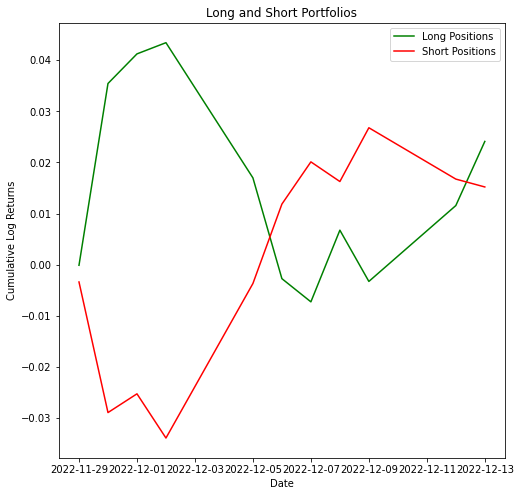

In [108]:
# Looking at the long side and short side of our portfolio separately
plt.plot(long_positions.mean(axis=1).cumsum(), color='g', label='Long Positions')
plt.plot(-short_positions.mean(axis=1).cumsum(), color='r', label='Short Positions')
plt.title('Long and Short Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Log Returns')
plt.legend()

Let's see the portfolio returns in an opposite market

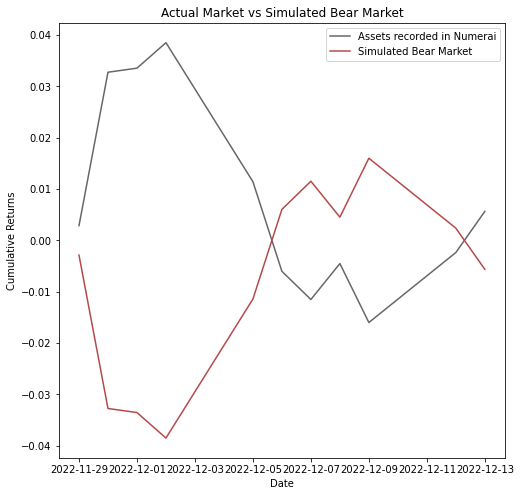

In [109]:
# Make copy of the dataframe to simulate opposite  market
bad_market = log_returns_full.copy()

# Subtract twice the daily average of log returns from each return that day
for idx in bad_market.index:
    bad_market.loc[idx] = bad_market.loc[idx] - 2 * bad_market.loc[idx].mean()

# Plot the results
plt.plot(log_returns_full.mean(axis=1).cumsum(), c='#666666', label='Assets recorded in Numerai')
plt.plot(bad_market.mean(axis=1).cumsum(), c='#b54848', label='Simulated Bear Market')
plt.title('Actual Market vs Simulated Market')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()

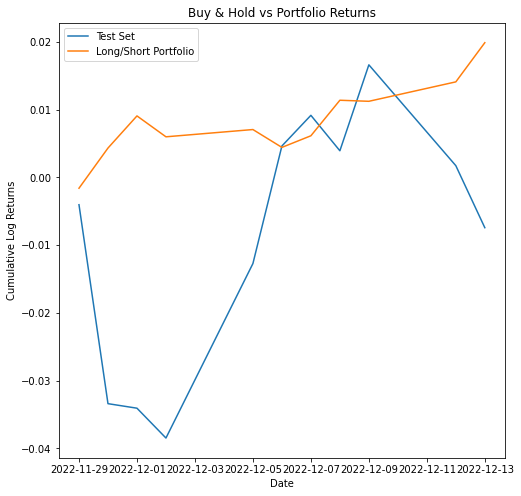

In [110]:
# Separate the long and short positions of our portfolio
long_positions_bear = bad_market[long_tickers]
short_positions_bear = bad_market[short_tickers]

# Combine long and short positions to make portfolio, reversing sign of short positions
bear_portfolio_returns = pd.concat([long_positions_bear, -short_positions_bear], axis=1)

# Plot Buy & Hold Strategy vs Portfolio
plt.plot(bad_market[y_test.index].mean(axis=1).cumsum(), label='Test Set')
plt.plot(bear_portfolio_returns.mean(axis=1).cumsum(), label='Long/Short Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Log Returns')
plt.title('Buy & Hold vs Portfolio Returns')
plt.legend()

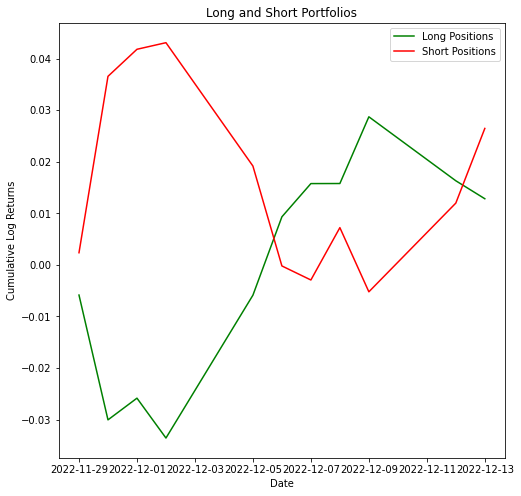

In [111]:
# View the long and short positions during the bear market separately
plt.plot(long_positions_bear.mean(axis=1).cumsum(), color='g', label='Long Positions')
plt.plot(-short_positions_bear.mean(axis=1).cumsum(), color='r', label='Short Positions')
plt.title('Long and Short Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Log Returns')
plt.legend()